***
## Author Name: Pratik Sayanekar 
### Data Science Project in Python 
# Binary and Multiclass Text Classification using Machine Learning Algorithms
***

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#task1" role="tab" aria-controls="profile">Task 1: Data Collection<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#task2" role="tab" aria-controls="settings">Task 2: Binary Text Classification<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#preprocessing" role="tab" aria-controls="settings">Preprocessing and EDA <span class="badge badge-primary badge-pill">2.1</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#feature" role="tab" aria-controls="settings">Feature Engineering: Text to Vector<span class="badge badge-primary badge-pill">2.1</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#machine" role="tab" aria-controls="settings">Machine Learning Model Implementation<span class="badge badge-primary badge-pill">2.2</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#task3" role="tab" aria-controls="settings">Task 3: Multi-class Text Classification<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#preprocessing2" role="tab" aria-controls="settings">Preprocessing and Feature Engineering<span class="badge badge-primary badge-pill">3.1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#machine2" role="tab" aria-controls="settings">Machine Learning Model Implementation : Multiclass<span class="badge badge-primary badge-pill">3.2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#wordembedding" role="tab" aria-controls="settings">Word Embeddings for Neural Network<span class="badge badge-primary badge-pill">3.3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#conclusion" role="tab" aria-controls="settings">Conclusion<span class="badge badge-primary badge-pill">4</span></a>

# <a id ='task1'>Task 1: Data Collection

In [1]:
! pip install textblob

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.metrics import confusion_matrix, accuracy_score

import xgboost
import textblob, string
import re
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pratiksayanekar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<b> Let's request the URL and explore the response first.. <br>
    Here, we will try to get the element first in order to create a method for data collection.
</b>

In [2]:
url = "http://mlg.ucd.ie/modules/COMP41680/assignment2/index.html"
html = urlopen(url)
print("HTTP Status: ", html.status)

HTTP Status:  200


In [3]:
response = BeautifulSoup(html)

<b>BeautifulSoup:
Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits 
atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.</b>

In [4]:
response

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="noindex" name="robots"/>
<meta content="Content on this site is posted for teaching purposes only. Original data is from theguardian.com" name="description"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>News Archive Home</title>
<link href="images/favicon.ico" rel="shortcut icon"/>
<!-- Bootstrap core CSS -->
<link href="assets/css/bootstrap.css" rel="stylesheet"/>
<!-- Custom styles for this template -->
<link href="assets/css/style.css" rel="stylesheet"/>
<link href="assets/css/font-awesome.min.css" rel="stylesheet"/>
<script src="assets/js/modernizr.js"></script>
</head>
<body>
<div class="container mtb">
<div class="jumbotron">
<h1><a href="index.html">News Archive</a></h1>
<p>Archive of news headlines and stories from 2020, organised per month.</p>
</div>
<div class="row">
<div class="col-md-10" id="content">
<div id

<b> Let's retrieve all months and create the URL for each month </b>

In [5]:
months = response.find_all('a', attrs={'class':'list-group-item list-group-item-action'})

In [6]:
for m in months:
    print(m['href'])

month-jan-001.html
month-feb-001.html
month-mar-001.html
month-apr-001.html
month-may-001.html
month-jun-001.html
month-jul-001.html
month-aug-001.html
month-sep-001.html
month-oct-001.html
month-nov-001.html
month-dec-001.html


In [7]:
months_url =[]
for m in months:
    months_url.append(url.replace('index.html', m['href']))
months_url

['http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-feb-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-mar-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-may-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jun-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-sep-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-oct-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-nov-001.html',
 'http://mlg.ucd.ie/modules/COMP41680/assignment2/month-dec-001.html']

<b>Now we have entry point URL of each month. We can use these entry points to get further pages associated to each month. <br>
    Let's request and check the response for first month</b>

In [8]:
html = urlopen(months_url[1])
print("HTTP Status: ", html.status)

HTTP Status:  200


In [9]:
response = BeautifulSoup(html)

In [10]:
response

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="noindex" name="robots"/>
<meta content="Content on this site is posted for teaching purposes only. Original data is from theguardian.com" name="description"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>News Archive February 2020</title>
<link href="images/favicon.ico" rel="shortcut icon"/>
<!-- Bootstrap core CSS -->
<link href="assets/css/bootstrap.css" rel="stylesheet"/>
<!-- Custom styles for this template -->
<link href="assets/css/style.css" rel="stylesheet"/>
<link href="assets/css/font-awesome.min.css" rel="stylesheet"/>
<script src="assets/js/modernizr.js"></script>
</head>
<body>
<div class="container mtb">
<div class="jumbotron">
<h1><a href="index.html">News Archive</a></h1>
<p>Article collection — February 2020</p>
</div>
<div class="row">
<div class="col-md-10" id="content">
<div id="all">
<h4 class="results

<b>After analysing response of above request, we need to fetch below details,</b>
<ol>
<li><b>Number of Pages: </b> To fetch the data of all pages of each month</li>
<li><b>Article</b></li>
    <ol>
        <li>Title</li>
        <li>Content</li>
        <li>Category</li>
    </ol>
</ol>


<b>Let's extract the Number of Pages for specific month</b>

In [11]:
response.find('h4').text

'1,492 results — Page 1 of 30'

In [12]:
print("Number of pages associated with month:", response.find('h4').text[-2:])

Number of pages associated with month: 30


<b>Let's extract the article</b>

In [13]:
response.find_all('div', attrs={'class':'article'})[0]

<div class="article"><h5>1. <a href="https://www.theguardian.com/sport/blog/2020/feb/01/talking-horses-sharjah-irish-champion-hurdle-horse-racing-tips" target="_blank">Talking Horses: Sharjah can prevail on Irish Champion Hurdle day</a></h5><p class="metadata">Sat 1 Feb 2020 00:01 GMT</p><p class="metadata">Category: Sport</p><p class="snippet">It is not available to viewers of ITV4 but the Irish Champion Hurdle is undoubtedly the big race of the day, with the betting market evidently expecti …</p></div>

In [14]:
"Length of articles on single page: ", len(response.find_all('div', attrs={'class':'article'}))

('Length of articles on single page: ', 50)

<b>Let's extract the title of article</b>

In [15]:
titles = response.find_all('a', attrs={'target':'_blank'})
titles[0].text

'Talking Horses: Sharjah can prevail on Irish Champion Hurdle day'

<b>Let's extract the content of article</b>

In [16]:
response.find_all('p', attrs={'class':'snippet'})[0].text

'It is not available to viewers of ITV4 but the Irish Champion Hurdle is undoubtedly the big race of the day, with the betting market evidently expecti …'

<b> Let's extract category of article </b>

In [17]:
print(response.find_all('i'))
len(response.find_all('i'))

[<i>Politics</i>, <i>Life-and-Style</i>, <i>Life-and-Style</i>, <i>Life-and-Style</i>, <i>Life-and-Style</i>, <i>Politics</i>, <i>Sport</i>, <i>Sport</i>, <i>US-News</i>, <i>Books</i>, <i>Music</i>, <i>Business</i>]


12

In [18]:
print(response.find_all('span'))
len(response.find_all('span'))

[<span>Summary: </span>, <span>Life-and-Style</span>, <span>Summary: </span>, <span>Sport</span>, <span>Summary: </span>, <span>Music</span>, <span>Film</span>, <span>Summary: </span>, <span>Summary: </span>, <span>Summary: </span>, <span>Summary: </span>, <span>Life-and-Style</span>, <span>Summary: </span>, <span aria-hidden="true">First</span>, <span class="sr-only">First</span>, <span aria-hidden="true">« Previous</span>, <span class="sr-only">Previous</span>, <span aria-hidden="true">Next »</span>, <span class="sr-only">Next</span>, <span aria-hidden="true">Last</span>, <span class="sr-only">Last</span>]


21

In [19]:
print(response.find_all('p', attrs={'class':'metadata'})[0:5])
len(response.find_all('p', attrs={'class':'metadata'}))

[<p class="metadata">Sat 1 Feb 2020 00:01 GMT</p>, <p class="metadata">Category: Sport</p>, <p class="metadata">Sat 1 Feb 2020 00:12 GMT</p>, <p class="metadata">Category: Politics</p>, <p class="metadata">Sat 1 Feb 2020 01:31 GMT</p>]


100

<b>As the number of articles on each page is 50 then the number of categories should also match this count. We observed multiple pattern for categories, So to extract categories, the logic could be as follows,</b>

In [20]:
list(filter(lambda x:  'Category:' in x.text , response.find_all('p', attrs={'class':'metadata'})))

[<p class="metadata">Category: Sport</p>,
 <p class="metadata">Category: Politics</p>,
 <p class="metadata">Category: US-News</p>,
 <p class="metadata">Category: US-News</p>,
 <p class="metadata">Category: <i>Politics</i></p>,
 <p class="metadata">Category: <span>Life-and-Style</span></p>,
 <p class="metadata">Category: <i>Life-and-Style</i></p>,
 <p class="metadata">Category: <i>Life-and-Style</i></p>,
 <p class="metadata">Category: Books</p>,
 <p class="metadata">Category: Life-and-Style</p>,
 <p class="metadata">Category: Film</p>,
 <p class="metadata">Category: Life-and-Style</p>,
 <p class="metadata">Category: US-News</p>,
 <p class="metadata">Category: <span>Sport</span></p>,
 <p class="metadata">Category: Books</p>,
 <p class="metadata">Category: Life-and-Style</p>,
 <p class="metadata">Category: US-News</p>,
 <p class="metadata">Category: <i>Life-and-Style</i></p>,
 <p class="metadata">Category: <i>Life-and-Style</i></p>,
 <p class="metadata">Category: <i>Politics</i></p>,
 <p 

In [21]:
len(list(filter(lambda x:  'Category:' in x.text , response.find_all('p', attrs={'class':'metadata'}))))

50

In [22]:
categories = list(filter(lambda x:  'Category:' in x.text , response.find_all('p', attrs={'class':'metadata'})))

In [23]:
for c in categories:
    print(c.text.replace('Category: ','').strip())

Sport
Politics
US-News
US-News
Politics
Life-and-Style
Life-and-Style
Life-and-Style
Books
Life-and-Style
Film
Life-and-Style
US-News
Sport
Books
Life-and-Style
US-News
Life-and-Style
Life-and-Style
Politics
Politics
Sport
Music
Politics
Film
Music
Film
Sport
Business
Film
Music
Business
US-News
Politics
Sport
US-News
Sport
Sport
Sport
US-News
Books
Books
Music
Sport
Life-and-Style
Politics
Sport
Politics
Life-and-Style
Business


<b>We are able to extract all required attributes such as all month's URL, number of pages associated to each month, and article related data.<br> Let's create a method to extract all this information.</b>

In [24]:
def fetch_all_urls():
    urls = []
    for month in months_url:
        urls.append(month) # appending initial month url
        
        print("Request to ...", month)
        html = urlopen(month)
        print("HTTP repsonse: ", 'Success' if html.status==200 else 'Failure')
        
        # Failure response handling
        while html.status != 200: 
            print("HTTP response")
            html = urlopen(month)
        
        response = BeautifulSoup(html)
        pages = int(response.find('h4').text[-2:]) # retrive number of pages associated with each month
        print("Number of Pages: ", pages)
        
        for page in range (2, pages+1):
            page = str(page).rjust(3,'0')
            month = month.replace(month[-8:-5],page) # Creating URL for each page associated to the month
            urls.append(month)
    return urls

In [25]:
urls = fetch_all_urls()

Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-001.html
HTTP repsonse:  Success
Number of Pages:  31
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-feb-001.html
HTTP repsonse:  Success
Number of Pages:  30
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-mar-001.html
HTTP repsonse:  Success
Number of Pages:  28
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-001.html
HTTP repsonse:  Success
Number of Pages:  25
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-may-001.html
HTTP repsonse:  Success
Number of Pages:  27
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jun-001.html
HTTP repsonse:  Success
Number of Pages:  28
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-001.html
HTTP repsonse:  Success
Number of Pages:  28
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-001.html
HTTP repsonse:  Success
Numbe

In [26]:
len(urls)

330

<b>We have collected all the URLs to collect articles, Let's create a method to extract article details</b>

<b>Let's create an empty dataframe to store the article data.</b>

In [27]:
df = pd.DataFrame(columns=['Title','Content','Category'])
df.head()

,Title,Content,Category


In [28]:
def create_article_dataset(urls, df):
    for url in urls:
        print("Request to ...", url)
        html = urlopen(url)
        print("HTTP repsonse: ", 'Success' if html.status==200 else 'Failure')
        
        # Failure response handling
        while html.status != 200: 
            print("HTTP response")
            html = urlopen(url)
                
        response = BeautifulSoup(html)
        articles = response.find_all('div', attrs={'class':'article'}) # extract list of all articles
        print("Number of articles found on page: ", len(articles))
        
        # extract details of each articles and append to dataframe
        for a in articles:
            title = a.find('a', attrs={'target':'_blank'}).text
            content = a.find('p', attrs={'class':'snippet'}).text
            category = list(filter(lambda x:  'Category:' in x.text , a.find_all('p', attrs={'class':'metadata'})))
            category = category[0].text.replace("Category: ","")
            df = df.append({
                "Title": title,
                "Content": content,
                "Category": category},
                ignore_index = True)
        print("--- All articles are inserted into dataframe. Length of dataset:", len(df))
    return df

In [29]:
df = create_article_dataset(urls, df)

Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-001.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 50
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-002.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 100
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-003.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 150
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-004.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 200
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-005.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- A

--- All articles are inserted into dataframe. Length of dataset: 1922
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-feb-009.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 1972
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-feb-010.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 2022
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-feb-011.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 2072
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-feb-012.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 2122
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-feb-0

--- All articles are inserted into dataframe. Length of dataset: 3864
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-mar-018.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 3914
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-mar-019.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 3964
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-mar-020.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 4014
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-mar-021.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 4064
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-mar-0

--- All articles are inserted into dataframe. Length of dataset: 5768
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-may-004.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 5818
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-may-005.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 5868
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-may-006.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 5918
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-may-007.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 5968
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-may-0

Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 7683
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jun-016.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 7733
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jun-017.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 7783
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jun-018.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 7833
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jun-019.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 7883
Request to ... http://mlg.ucd.ie/mod

--- All articles are inserted into dataframe. Length of dataset: 9609
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-027.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 9659
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-028.html
HTTP repsonse:  Success
Number of articles found on page:  8
--- All articles are inserted into dataframe. Length of dataset: 9667
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-001.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 9717
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-002.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 9767
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-00

--- All articles are inserted into dataframe. Length of dataset: 11471
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-sep-012.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 11521
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-sep-013.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 11571
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-sep-014.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 11621
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-sep-015.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 11671
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-

HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 13418
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-oct-024.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 13468
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-oct-025.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 13518
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-oct-026.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 13568
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-oct-027.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 13618
Request

Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 15306
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-dec-007.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 15356
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-dec-008.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 15406
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-dec-009.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 15456
Request to ... http://mlg.ucd.ie/modules/COMP41680/assignment2/month-dec-010.html
HTTP repsonse:  Success
Number of articles found on page:  50
--- All articles are inserted into dataframe. Length of dataset: 15506
Request to ... http://mlg.ucd.i

In [30]:
df.head(5)

,Title,Content,Category
0,"Let's resolve to reconnect, says Welby in new ...",The archbishop of Canterbury will urge people ...,UK-News
1,Be honest. You're not going to read all those ...,"Every year, about this time, my Instagram feed...",Books
2,Mariah Carey's Twitter account hacked on New Y...,Mariah Carey’s Twitter account appeared to hav...,Music
3,The joy audit: how to have more fun in 2020,The last time I felt joy was at an event that ...,Life-and-Style
4,Providence Lost by Paul Lay review – the rise ...,The only public execution of a British head of...,Books


In [31]:
df.tail(5)

,Title,Content,Category
16221,Joe Biden to hold national memorial service fo...,Joe Biden plans to lead a unique nationwide me...,US-News
16222,Chess: Magnus Carlsen 'in a deep funk' after l...,Magnus Carlsen’s erratic form since his 30th b...,Sport
16223,Toby Flood leading Newcastle revival in Jonny ...,Summary: Amid the cluster of young English fly...,Sport
16224,"MF Doom, iconic masked hip-hop MC, dies aged 49","MF Doom, one of US hip-hop’s most distinctive ...",Music
16225,"Brexit: in crisis, without fanfare, UK finally...","Four years, 27 weeks and two days after a refe...",Politics


In [32]:
df.Category.value_counts()

Books             1821
Sport             1819
Business          1817
US-News           1815
Politics          1808
Music             1797
UK-News           1795
Life-and-Style    1783
Film              1771
Name: Category, dtype: int64

<b>Saving three categories as 'Film', 'Politics' and 'Sport'</b>

In [33]:
df = df.loc[df.Category.isin(['Film','Politics', 'Sport'])]

In [34]:
df.to_csv("raw_data.csv", index=False)

***
## Task 1 Insights:
<b><li>Initial cells gives the detailed description of how each element of web site can be accessed. That is useful to decide an approach to do web scraping.</li>
<li>After collection of all URLs including all months, A method is created to collect data, HTTP request failure scenario is also handled programatically to ensure the integrity of data.</li>
<li>As per assignment problem statement, the data of choosen category is were selected by filtering out dataframe. This has been saved as csv file.</li></b>

***

# <a id = 'task2'>TASK 2 : Binary Text Classification

<b>Loading the dataset created in task 1</b>

In [35]:
df = pd.read_csv('raw_data.csv')
df.head()

,Title,Content,Category
0,"War epics, airmen and young Sopranos: essentia...",1917 An epic of Lean-ian proportions is delive...,Film
1,Twenty athletes set to light up the Tokyo 2020...,"Dina Asher-Smith Great Britain Athletics, 100m...",Sport
2,The most exciting movies of 2020 – horror,The Grudge A belated English language reboot o...,Film
3,Clive Lewis calls for unity among Labour leade...,Summary: The Labour leadership hopeful Clive L...,Politics
4,Michael van Gerwen 3-7 Peter Wright: PDC world...,"Summary: That’s it for tonight’s blog, so I’ll...",Sport


<b>Concat 'Title' and 'Content' as 'Text' attribute</b>

In [36]:
df['Text'] = df[['Title', 'Content']].apply(lambda x: ' '.join(x), axis=1)

df.drop(['Title', 'Content'], inplace=True, axis = 1)

df.Text = df.Text.astype('str') 

df.head()

,Category,Text
0,Film,"War epics, airmen and young Sopranos: essentia..."
1,Sport,Twenty athletes set to light up the Tokyo 2020...
2,Film,The most exciting movies of 2020 – horror The ...
3,Politics,Clive Lewis calls for unity among Labour leade...
4,Sport,Michael van Gerwen 3-7 Peter Wright: PDC world...


In [37]:
df.Category.value_counts()

Sport       1819
Politics    1808
Film        1771
Name: Category, dtype: int64

****
# <a id= 'preprocessing'>Preprocessing of Text Data

## Text based features and NLP Features 

<b>There are some textual features that we can monitor as a part of data preprocessing stage. These features directs the further cleaning approach and modeling approach. They are as follows,

<li>Number of characters</li>
<li>Number of words</li>
<li>Character to word ratio</li>
<li>Number of punctuations</li>
<li>Number of Title words</li>    
<li>Number of Upper case words</li>
    
</b>

In [38]:
def generate_text_features(df):
    df['char_count'] = df['Text'].apply(len)
    df['word_count'] = df['Text'].apply(lambda x: len(x.split()))
    df['word_density'] = df['char_count'] / (df['word_count']+1)
    df['punctuation_count'] = df['Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
    df['title_word_count'] = df['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
    df['upper_case_word_count'] = df['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [39]:
generate_text_features(df)

In [40]:
df.head(5)

,Category,Text,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
0,Film,"War epics, airmen and young Sopranos: essentia...",215,36,5.810811,6,5,0
1,Sport,Twenty athletes set to light up the Tokyo 2020...,208,34,5.942857,7,12,0
2,Film,The most exciting movies of 2020 – horror The ...,194,32,5.878788,5,13,1
3,Politics,Clive Lewis calls for unity among Labour leade...,222,35,6.166667,2,10,0
4,Sport,Michael van Gerwen 3-7 Peter Wright: PDC world...,250,43,5.681818,7,9,1


<b>In NLP, POS tagging i.e. Part of speech tagging where number of nouns, pronouns, verb, adjectives and adverb are extracted from the corpus. We can monitor these attributes to decide further preprocessing strategy.</b>

In [41]:
# function to check and get the part of speech tag count of a words in a given sentence
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                #print(tup)
                cnt += 1
    except:
        pass
    return cnt


def generate_NLP_features(df):
    df['noun_count'] = df['Text'].apply(lambda x: check_pos_tag(x, 'noun'))
    df['verb_count'] = df['Text'].apply(lambda x: check_pos_tag(x, 'verb'))
    df['adj_count'] = df['Text'].apply(lambda x: check_pos_tag(x, 'adj'))
    df['adv_count'] = df['Text'].apply(lambda x: check_pos_tag(x, 'adv'))
    df['pron_count'] = df['Text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [42]:
generate_NLP_features(df)

In [43]:
df.head()

,Category,Text,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,Film,"War epics, airmen and young Sopranos: essentia...",215,36,5.810811,6,5,0,14,4,5,0,1
1,Sport,Twenty athletes set to light up the Tokyo 2020...,208,34,5.942857,7,12,0,14,6,0,0,1
2,Film,The most exciting movies of 2020 – horror The ...,194,32,5.878788,5,13,1,14,3,4,1,0
3,Politics,Clive Lewis calls for unity among Labour leade...,222,35,6.166667,2,10,0,17,6,4,0,1
4,Sport,Michael van Gerwen 3-7 Peter Wright: PDC world...,250,43,5.681818,7,9,1,23,6,5,1,5


In [44]:
df.describe()

,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
count,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000
mean,222.457392,38.055576,5.727006,3.732123,7.430530,0.585773,16.280474,6.140978,3.356243,1.275102,1.442386
std,13.985419,3.707814,0.440574,2.241020,3.080161,0.877718,3.208734,2.154652,1.780317,1.330398,1.470202
min,169.000000,27.000000,4.604167,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,216.000000,36.000000,5.416667,2.000000,5.000000,0.000000,14.000000,5.000000,2.000000,0.000000,0.000000
50%,222.000000,38.000000,5.700000,3.000000,7.000000,0.000000,16.000000,6.000000,3.000000,1.000000,1.000000
75%,229.000000,40.000000,6.000000,5.000000,9.000000,1.000000,18.000000,8.000000,4.000000,2.000000,2.000000
max,291.000000,55.000000,7.571429,15.000000,25.000000,6.000000,30.000000,16.000000,13.000000,10.000000,10.000000


***
<b> Insights: After analysing all text features we have to do cleaning to handle below scenarios,
<li>Remove punctuations</li>
<li>Remove stopwards</li>
<li>Apply Lemmatization</li>
<li>Remove alphanumeric words</li>
<li>Convert all words to lowercase</li>
</b>


In [45]:
def preprocess_text(df):
    #Removing all the punctuations
    punctuations = string.punctuation
    df.loc[:,'Text'] = df.Text.apply(lambda x: x.translate(str.maketrans('', '', punctuations)))

    #Removing all the stopwords
    stopword = stopwords.words('english')
    stopword.append('Summary:')
    df.loc[:,'Text'] = df.Text.apply(lambda x: " ".join([word for word in str(x).split() 
                                                                     if word not in stopword]))
    #Lemmatizing
    lemmat = WordNetLemmatizer()
    df.loc[:,'Text'] = df.Text.apply(lambda x: " ".join([lemmat.lemmatize(word,'v') 
                                                                           for word in x.split()]))
    df.loc[:,'Text'] = df.Text.apply(lambda x: " ".join([lemmat.lemmatize(word,'n') 
                                                                           for word in x.split()]))

    #Removing alphanumeric words
    df.loc[:,'Text'] = df.Text.apply(lambda x: re.sub(r'\w\d\w', '', x).strip())

    #Converting to lowercase
    df.loc[:,'Text'] = df.Text.str.lower()
    
    return df

In [46]:
df = preprocess_text(df)

In [47]:
generate_text_features(df)
generate_NLP_features(df)

In [48]:
df.head(5)

,Category,Text,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,Film,war epic airman young sopranos essential film ...,152,24,6.080000,0,0,0,14,2,5,0,0
1,Sport,twenty athlete set light tokyo 0 olympics dina...,151,26,5.592593,0,0,0,9,5,8,1,0
2,Film,the excite movie 0 – horror the grudge a belat...,156,26,5.777778,0,0,0,12,1,6,0,0
3,Politics,clive lewis call unity among labour leadership...,185,27,6.607143,0,0,0,17,1,8,0,0
4,Sport,michael van gerwen 37 peter wright pdc world d...,192,30,6.193548,0,0,0,21,8,4,2,0


In [49]:
df.describe()

,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
count,5398.000000,5398.000000,5398.000000,5398.0,5398.0,5398.0,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000
mean,164.859207,25.683772,6.202895,0.0,0.0,0.0,14.929418,3.477399,5.123564,1.074287,0.322527
std,15.939150,2.694747,0.531603,0.0,0.0,0.0,3.099849,1.697787,2.015071,1.127684,0.613220
min,107.000000,16.000000,4.592593,0.0,0.0,0.0,4.000000,0.000000,0.000000,0.000000,0.000000
25%,155.000000,24.000000,5.838710,0.0,0.0,0.0,13.000000,2.000000,4.000000,0.000000,0.000000
50%,165.000000,26.000000,6.192308,0.0,0.0,0.0,15.000000,3.000000,5.000000,1.000000,0.000000
75%,175.000000,27.000000,6.551724,0.0,0.0,0.0,17.000000,5.000000,6.000000,2.000000,1.000000
max,226.000000,38.000000,8.476190,0.0,0.0,0.0,28.000000,11.000000,14.000000,9.000000,6.000000


<b>Insights:
We observe the significant improvement in word density and ultimately character and word count after preprocessing as compared to original data as shown above. 
</b>

***
<b> As mentioned in the assignment, we need to create unique pair of each target category from dataset, so the unique pairs are as below,
<ol>
<li>Film and Politics</li>
<li>Film and Sport</li>
<li>Sport and Politics</li>
</ol></b>

NOTE: We will be processing all these three database one after another throughout the classification, that way it will be easier to compare the process and results for each pair of categories

In [50]:
df_1 = df.loc[df.Category.isin(['Film','Politics'])]
df_2 = df.loc[df.Category.isin(['Film','Sport'])]
df_3 = df.loc[df.Category.isin(['Sport','Politics'])]
df_1.shape, df_2.shape, df_3.shape

((3579, 13), (3590, 13), (3627, 13))

In [51]:
# split the dataset into train and text datasets 
X_train_1, X_test_1, y_train_1, y_test_1 = model_selection.train_test_split(df_1['Text'], df_1['Category'], shuffle=True, 
                                                                    stratify=df_1['Category'], test_size=0.20)

X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(df_2['Text'], df_2['Category'], shuffle=True,
                                                                    stratify=df_2['Category'], test_size=0.20)

X_train_3, X_test_3, y_train_3, y_test_3 = model_selection.train_test_split(df_3['Text'], df_3['Category'], shuffle=True,
                                                                    stratify=df_3['Category'], test_size=0.20)

In [52]:
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((2863,), (716,), (2863,), (716,))

In [53]:
X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

((2872,), (718,), (2872,), (718,))

In [54]:
X_train_3.shape, X_test_3.shape, y_train_3.shape, y_test_3.shape

((2901,), (726,), (2901,), (726,))

In [55]:
y_test_1.value_counts(), y_test_2.value_counts(), y_test_3.value_counts(), 

(Politics    362
 Film        354
 Name: Category, dtype: int64,
 Sport    364
 Film     354
 Name: Category, dtype: int64,
 Sport       364
 Politics    362
 Name: Category, dtype: int64)

****
# <a id = 'feature'>Feature Engineering: Text to vector

<b> We have to tranform the raw data into feature vectors </b>

## 1. Count Vector: 
<b>Count Vector is a matrix notation of the dataset where 
    <li> every row represents a document from the corpus </li> 
    <li> every column represents a term from the corpus </li> 
    <li> every cell represents the frequency count of a particular term in a particular document </li>
</b> 

In [56]:
def create_CountVectorizer(X_train, X_test):
    # create a count vectorizer object 
    count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
    count_vect.fit(X_train)

    # transform the train and test data using count vectorizer object
    xtrain_count =  count_vect.transform(X_train)
    xtest_count =  count_vect.transform(X_test)

    return xtrain_count, xtest_count

## 2. TF - IDF Vector :

<b>TF-IDF represents the importance of term in relative document as well as corpus. This value is calculated by considering two terms as 'Term Frequency' and 'Inverse Document Frequency'. The formula is as follows,</b>
    
<span style="color:blue">
<li> TF(t) = (Number of times term 't' appears in a document) / (Total number of terms in the document) </li>
<li> IDF(t) = log_e(Total number of documents / Number of documents with term t in it) </li> 
</span>

<b>TF - IDF vector can be generated using different level of input tokens such as words, characters and n-gram.</b>

In [57]:
# word level tf-idf
def tfidf_word(X_train, X_test):
    tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
    tfidf_vect.fit(X_train)
    xtrain_tfidf =  tfidf_vect.transform(X_train)
    xtest_tfidf =  tfidf_vect.transform(X_test)
    print("TF-IDF word level: ", xtrain_tfidf.shape, xtest_tfidf.shape)
    return xtrain_tfidf, xtest_tfidf

# ngram level tf-idf 
def tfidf_ngram(X_train, X_test):
    tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3))
    tfidf_vect_ngram.fit(X_train)
    xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
    xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)
    print("TF-IDF ngram level: ", xtrain_tfidf_ngram.shape, xtest_tfidf_ngram.shape)
    return xtrain_tfidf_ngram, xtest_tfidf_ngram


# characters level tf-idf
def tfidf_char(X_train, X_test):
    tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3))
    tfidf_vect_ngram_chars.fit(X_train)
    xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
    xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)
    print("TF-IDF character level: ", xtrain_tfidf_ngram_chars.shape, xtest_tfidf_ngram_chars.shape)
    return xtrain_tfidf_ngram_chars, xtest_tfidf_ngram_chars

***
# <a id='machine'>Machine Learning Model Implementation:
    
    - Below few methods are implemented to reduce the code duplication and maintain the consistency in machine learning model implementation.
    - For each Machine Learning model, we have 4 different types of vectorized input, we will compares the performance of each vectorized input after evaluation of all ML models.

In [58]:
def plot_confusion_matrix(test, pred, labels):
    matrix = confusion_matrix(test, pred)
    print("Confusion Matrix: \n", matrix)
    fig = plt.figure(figsize=(8, 5))
    sns.heatmap(matrix / np.sum(matrix, axis=1), annot=True,
                fmt='.2%', cmap='Blues', xticklabels=labels,
                yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.show()

def train_model(classifier, feature_vector_train, label, feature_vector_test, y_test, labels, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
        y_test = y_test.argmax(axis=-1)
    
    plot_confusion_matrix(y_test, predictions, labels)
    
    accuracy = metrics.accuracy_score(y_test, predictions)
    
    return metrics.classification_report(y_test, predictions), accuracy

def encode_label(y_train, y_test):
    encoder = preprocessing.LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.fit_transform(y_test)
    return y_train, y_test

In [59]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def plot_bar_graph(logistic_acc, multinomial_acc, xgboost_acc):
    Tokenization = ['Count Vector', 'Word_TFIDF', 'Char_TFIDF', 'Ngram_TFIDF']

    x = np.arange(len(Tokenization))  # the label locations
    width = 0.25  # the width of the bars
    
    fig, ax = plt.subplots(figsize = (12,8))
    rects1 = ax.bar(x - width, logistic_acc, width, label='Logistic Regression')
    rects2 = ax.bar(x , multinomial_acc, width, label='Multinomial Naive Bayes')
    rects3 = ax.bar(x + width, xgboost_acc, width, label='XGBoost Classifier')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Text Vectorization Method')
    ax.set_title('Accuracy of Machine Learning models to Text Vectorization Method', fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(Tokenization)
    ax.legend(handles=[rects1, rects2, rects3], title='Machine Learning Models', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    autolabel(rects1, ax)
    autolabel(rects2, ax)
    autolabel(rects3, ax)
    
    plt.show()

***
# Pair 1 (Film & Politics) : 

In [60]:
y_test_1.value_counts()

Politics    362
Film        354
Name: Category, dtype: int64

In [61]:
# transform input
xtrain_count, xtest_count = create_CountVectorizer(X_train_1, X_test_1)

xtrain_tfidf, xtest_tfidf = tfidf_word(X_train_1, X_test_1)

xtrain_tfidf_ngram, xtest_tfidf_ngram = tfidf_ngram(X_train_1, X_test_1)

xtrain_tfidf_ngram_char, xtest_tfidf_ngram_char = tfidf_char(X_train_1, X_test_1)

# transform target variable
y_train, y_test = encode_label(y_train_1, y_test_1)

TF-IDF word level:  (2863, 12091) (716, 12091)
TF-IDF ngram level:  (2863, 114293) (716, 114293)
TF-IDF character level:  (2863, 9017) (716, 9017)


***
# MultinomialNB

Naive Bayes on Count Vectors: 

Confusion Matrix: 
 [[350   4]
 [  5 357]]


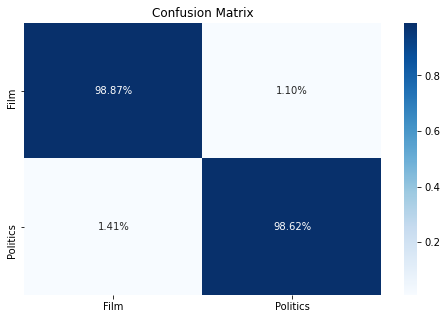

NB, Count Vectors: Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       354
           1       0.99      0.99      0.99       362

    accuracy                           0.99       716
   macro avg       0.99      0.99      0.99       716
weighted avg       0.99      0.99      0.99       716

**************************************************
Naive Bayes on Word Level TF IDF Vectors: 

Confusion Matrix: 
 [[345   9]
 [  3 359]]


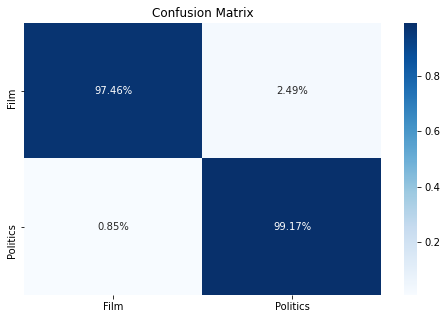

NB, WordLevel TF-IDF: Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       354
           1       0.98      0.99      0.98       362

    accuracy                           0.98       716
   macro avg       0.98      0.98      0.98       716
weighted avg       0.98      0.98      0.98       716

**************************************************
Naive Bayes on Ngram Level TF IDF Vectors: 

Confusion Matrix: 
 [[321  33]
 [ 12 350]]


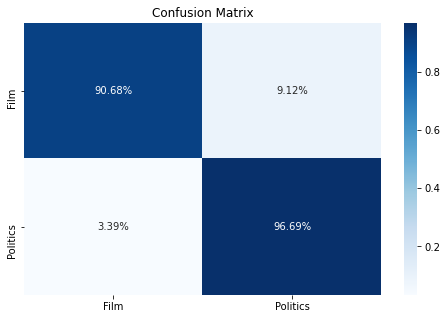

NB, N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       354
           1       0.91      0.97      0.94       362

    accuracy                           0.94       716
   macro avg       0.94      0.94      0.94       716
weighted avg       0.94      0.94      0.94       716

**************************************************
Naive Bayes on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[337  17]
 [ 10 352]]


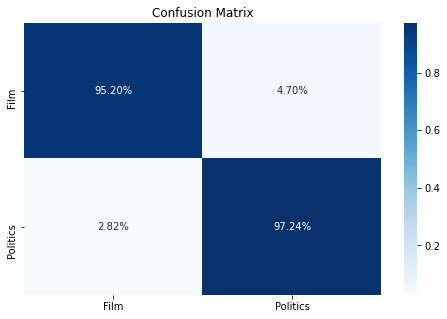

NB, CharLevel Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       354
           1       0.95      0.97      0.96       362

    accuracy                           0.96       716
   macro avg       0.96      0.96      0.96       716
weighted avg       0.96      0.96      0.96       716

**************************************************


In [62]:
Multinomial_ACC = []

# Naive Bayes on Count Vectors
print('Naive Bayes on Count Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test, 
                       labels = ['Film','Politics'])
Multinomial_ACC.append(score)
print("NB, Count Vectors: Classification Report\n", accuracy_report)
print('*'*50)

# Naive Bayes on Word Level TF IDF Vectors
print('Naive Bayes on Word Level TF IDF Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf, y_test,
                      labels = ['Film','Politics'])
Multinomial_ACC.append(score)
print("NB, WordLevel TF-IDF: Classification Report \n", accuracy_report)
print('*'*50)

# Naive Bayes on Ngram Level TF IDF Vectors
print('Naive Bayes on Ngram Level TF IDF Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test,
                      labels = ['Film','Politics'])
Multinomial_ACC.append(score)
print("NB, N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Naive Bayes on Character Level TF IDF Vectors
print('Naive Bayes on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char, y_test,
                      labels = ['Film','Politics'])
Multinomial_ACC.append(score)
print("NB, CharLevel Vectors: Classification Report \n", accuracy_report)
print('*'*50)

***
# Logistic Regression

LogisticRegression on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[350   4]
 [  5 357]]


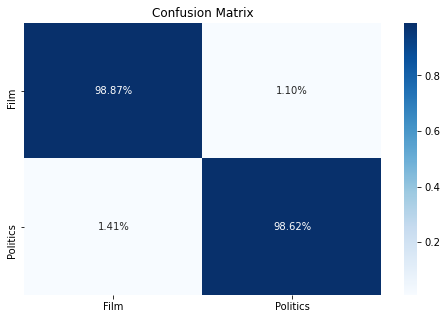

LogisticRegression(), Count Vectors: Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       354
           1       0.99      0.99      0.99       362

    accuracy                           0.99       716
   macro avg       0.99      0.99      0.99       716
weighted avg       0.99      0.99      0.99       716

**************************************************
LogisticRegression on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[351   3]
 [ 13 349]]


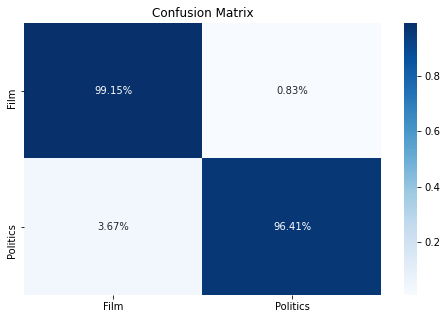

LogisticRegression(), WordLevel TF-IDF: Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       354
           1       0.99      0.96      0.98       362

    accuracy                           0.98       716
   macro avg       0.98      0.98      0.98       716
weighted avg       0.98      0.98      0.98       716

**************************************************
LogisticRegression on Ngram Level TF IDF Vectors: 

Confusion Matrix: 
 [[349   5]
 [ 40 322]]


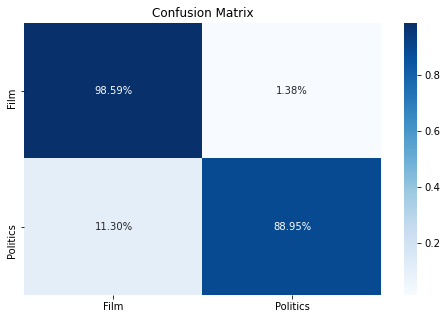

LogisticRegression(), N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       354
           1       0.98      0.89      0.93       362

    accuracy                           0.94       716
   macro avg       0.94      0.94      0.94       716
weighted avg       0.94      0.94      0.94       716

**************************************************
LogisticRegression on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[338  16]
 [ 15 347]]


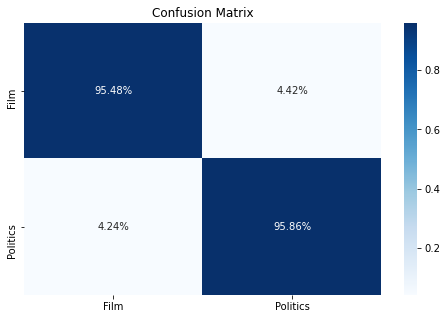

LogisticRegression(), CharLevel Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       354
           1       0.96      0.96      0.96       362

    accuracy                           0.96       716
   macro avg       0.96      0.96      0.96       716
weighted avg       0.96      0.96      0.96       716

**************************************************


In [63]:
Logistic_ACC = []
# LogisticRegression on Count Vectors
print('LogisticRegression on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xtest_count, y_test, 
                       labels = ['Film','Politics'])
Logistic_ACC.append(score)
print("LogisticRegression(), Count Vectors: Classification Report\n", accuracy_report)
print('*'*50)

# LogisticRegression on Word Level TF IDF Vectors
print('LogisticRegression on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf, y_test,
                      labels = ['Film','Politics'])
Logistic_ACC.append(score)
print("LogisticRegression(), WordLevel TF-IDF: Classification Report \n", accuracy_report)
print('*'*50)

# LogisticRegression on Ngram Level TF IDF Vectors
print('LogisticRegression on Ngram Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test,
                      labels = ['Film','Politics'])
Logistic_ACC.append(score)
print("LogisticRegression(), N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# LogisticRegression on Character Level TF IDF Vectors
print('LogisticRegression on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char, y_test,
                      labels = ['Film','Politics'])
Logistic_ACC.append(score)
print("LogisticRegression(), CharLevel Vectors: Classification Report \n", accuracy_report)
print('*'*50)

***
# xgboost.XGBClassifier()

XGBoost on Count Vectors: 

Confusion Matrix: 
 [[342  12]
 [  8 354]]


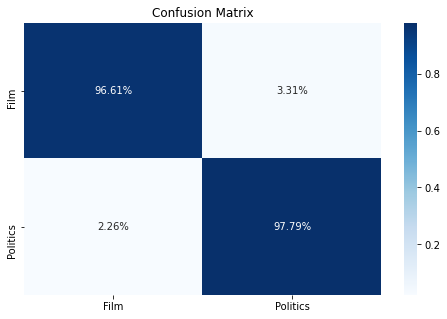

Xgb, Count Vectors: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       354
           1       0.97      0.98      0.97       362

    accuracy                           0.97       716
   macro avg       0.97      0.97      0.97       716
weighted avg       0.97      0.97      0.97       716

**************************************************
XGBoost on Word Level TF IDF Vectors: 

Confusion Matrix: 
 [[340  14]
 [ 10 352]]


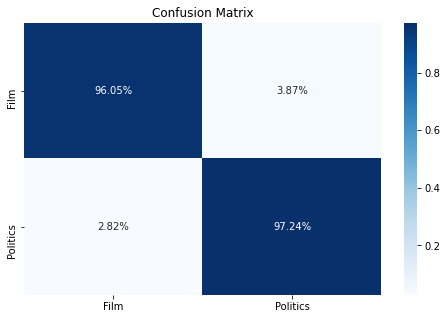

Xgb, WordLevel TF-IDF: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       354
           1       0.96      0.97      0.97       362

    accuracy                           0.97       716
   macro avg       0.97      0.97      0.97       716
weighted avg       0.97      0.97      0.97       716

**************************************************
XGBoost on Ngram Level TF IDF Vectors: 

Confusion Matrix: 
 [[350   4]
 [139 223]]


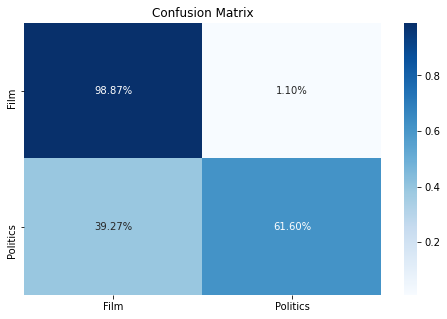

Xgb, N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83       354
           1       0.98      0.62      0.76       362

    accuracy                           0.80       716
   macro avg       0.85      0.80      0.79       716
weighted avg       0.85      0.80      0.79       716

**************************************************
XGBoost on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[338  16]
 [  9 353]]


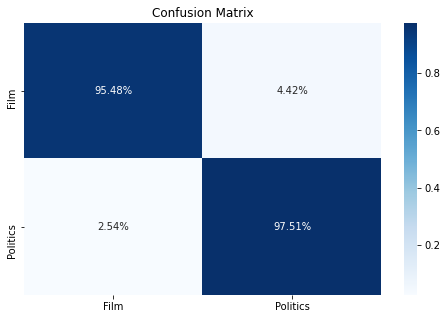

Xgb, CharLevel Vectors: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       354
           1       0.96      0.98      0.97       362

    accuracy                           0.97       716
   macro avg       0.97      0.96      0.97       716
weighted avg       0.97      0.97      0.97       716

**************************************************


In [64]:
XGBoost_ACC = []

# Extereme Gradient Boosting on Count Vectors
print('XGBoost on Count Vectors: \n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(),
                                     y_train, xtest_count.tocsc(), y_test, labels = ['Film','Politics'])
XGBoost_ACC.append(score)
print("Xgb, Count Vectors: \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
print('XGBoost on Word Level TF IDF Vectors: \n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(),
                                     y_train, xtest_tfidf.tocsc(), y_test, labels = ['Film','Politics'])
XGBoost_ACC.append(score)
print("Xgb, WordLevel TF-IDF: \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Ngram Level TF IDF Vectors
print('XGBoost on Ngram Level TF IDF Vectors: \n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), y_train, xtest_tfidf_ngram.tocsc(), 
                                     y_test, labels = ['Film','Politics'])
XGBoost_ACC.append(score)
print("Xgb, N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
print('XGBoost on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_char.tocsc(), y_train, 
                                     xtest_tfidf_ngram_char.tocsc(), y_test,  labels = ['Film','Politics'])
XGBoost_ACC.append(score)
print("Xgb, CharLevel Vectors: \n", accuracy_report)
print('*'*50)

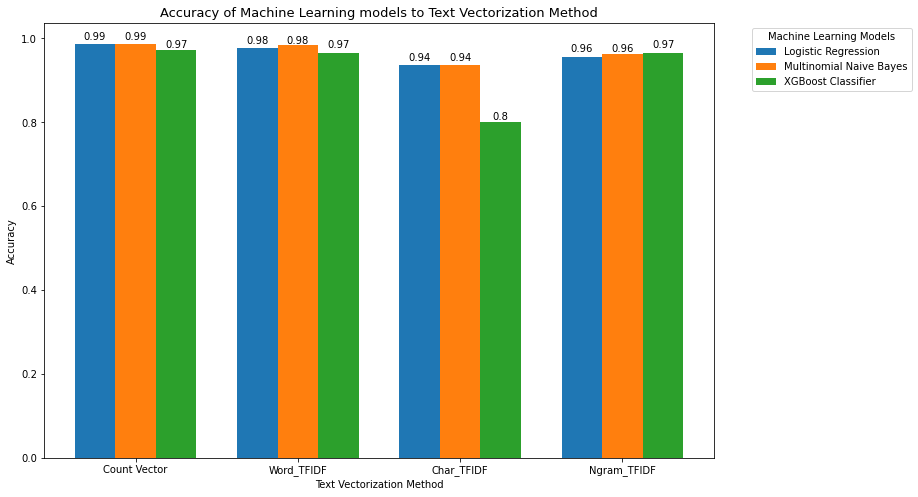

In [65]:
plot_bar_graph(Logistic_ACC, Multinomial_ACC, XGBoost_ACC)

## Insights: 
<b>
<li> We have implemented 3 machine learning models, for each machine learning model we have provided 4 different types of vectorized input. The comparision of accuracy is visualized in above grouped bar chart. </li>
<li> Among all vectorizer algorithm, count vectorizer is proven to be an efficient text to vector transformer with 99% accuracy for Logistic Regression and Multinomial Naive Bayes classifier and 97% for XGBoost classifier. We can improve XGBoost classifier's accuracy by further hyperparamter tuning.</li>
<li>In case of TFIDF vector transformation word level TFIDF is better than other two, character level and NGRAM character level TFIDF vector transformation.</li>    
</b>    

### Pair 2 (Film & Sport) : 

In [66]:
y_test_2.value_counts()

Sport    364
Film     354
Name: Category, dtype: int64

In [67]:
# transform input
xtrain_count, xtest_count = create_CountVectorizer(X_train_2, X_test_2)

xtrain_tfidf, xtest_tfidf = tfidf_word(X_train_2, X_test_2)

xtrain_tfidf_ngram, xtest_tfidf_ngram = tfidf_ngram(X_train_2, X_test_2)

xtrain_tfidf_ngram_char, xtest_tfidf_ngram_char = tfidf_char(X_train_2, X_test_2)

# transform target variable
y_train, y_test = encode_label(y_train_2, y_test_2)

TF-IDF word level:  (2872, 13305) (718, 13305)
TF-IDF ngram level:  (2872, 121610) (718, 121610)
TF-IDF character level:  (2872, 9441) (718, 9441)


### MultinomialNB

Naive Bayes on Count Vectors: 

Confusion Matrix: 
 [[350   4]
 [  7 357]]


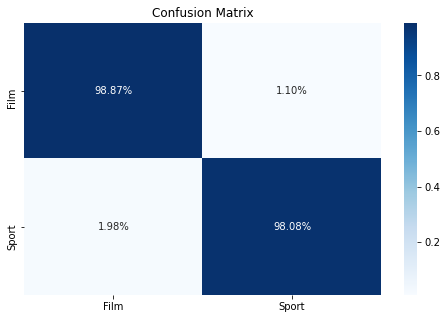

NB, Count Vectors: Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       354
           1       0.99      0.98      0.98       364

    accuracy                           0.98       718
   macro avg       0.98      0.98      0.98       718
weighted avg       0.98      0.98      0.98       718

**************************************************
Naive Bayes on Word Level TF IDF Vectors: 

Confusion Matrix: 
 [[345   9]
 [  6 358]]


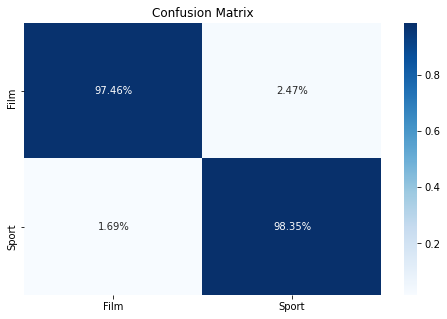

NB, WordLevel TF-IDF: Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       354
           1       0.98      0.98      0.98       364

    accuracy                           0.98       718
   macro avg       0.98      0.98      0.98       718
weighted avg       0.98      0.98      0.98       718

**************************************************
Naive Bayes on Ngram Level TF IDF Vectors: 

Confusion Matrix: 
 [[319  35]
 [ 27 337]]


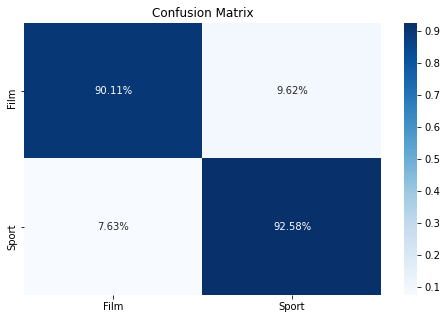

NB, N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       354
           1       0.91      0.93      0.92       364

    accuracy                           0.91       718
   macro avg       0.91      0.91      0.91       718
weighted avg       0.91      0.91      0.91       718

**************************************************
Naive Bayes on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[329  25]
 [ 11 353]]


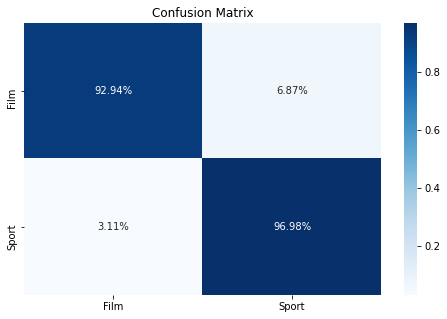

NB, CharLevel Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       354
           1       0.93      0.97      0.95       364

    accuracy                           0.95       718
   macro avg       0.95      0.95      0.95       718
weighted avg       0.95      0.95      0.95       718

**************************************************


In [68]:
Multinomial_ACC = []

# Naive Bayes on Count Vectors
print('Naive Bayes on Count Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test, 
                       labels = ['Film','Sport'])
Multinomial_ACC.append(score)
print("NB, Count Vectors: Classification Report\n", accuracy_report)
print('*'*50)

# Naive Bayes on Word Level TF IDF Vectors
print('Naive Bayes on Word Level TF IDF Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf, y_test,
                      labels = ['Film','Sport'])
Multinomial_ACC.append(score)
print("NB, WordLevel TF-IDF: Classification Report \n", accuracy_report)
print('*'*50)

# Naive Bayes on Ngram Level TF IDF Vectors
print('Naive Bayes on Ngram Level TF IDF Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test,
                      labels = ['Film','Sport'])
Multinomial_ACC.append(score)
print("NB, N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Naive Bayes on Character Level TF IDF Vectors
print('Naive Bayes on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char, y_test,
                      labels = ['Film','Sport'])
Multinomial_ACC.append(score)
print("NB, CharLevel Vectors: Classification Report \n", accuracy_report)
print('*'*50)

### Logistic Regression

Logistic Regression on Count Vectors: 

Confusion Matrix: 
 [[340  14]
 [  6 358]]


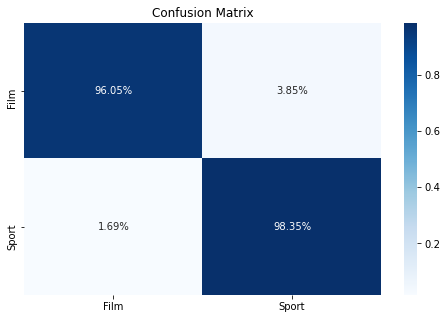

LogisticRegression(), Count Vectors: Classification Report
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       354
           1       0.96      0.98      0.97       364

    accuracy                           0.97       718
   macro avg       0.97      0.97      0.97       718
weighted avg       0.97      0.97      0.97       718

**************************************************
Logistic Regression on Word Level TF IDF Vectors: 

Confusion Matrix: 
 [[349   5]
 [  7 357]]


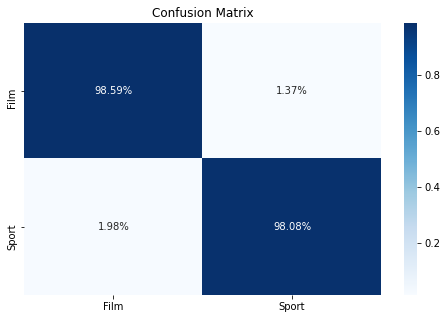

LogisticRegression(), WordLevel TF-IDF: Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       354
           1       0.99      0.98      0.98       364

    accuracy                           0.98       718
   macro avg       0.98      0.98      0.98       718
weighted avg       0.98      0.98      0.98       718

**************************************************
Logistic Regression on Ngram Level TF IDF Vectors: 

Confusion Matrix: 
 [[316  38]
 [ 33 331]]


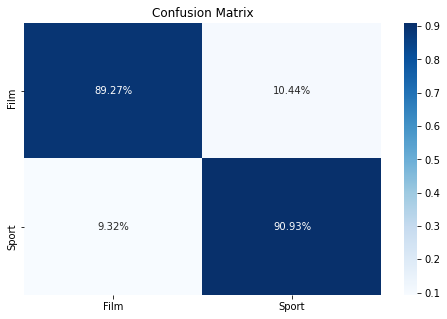

LogisticRegression(), N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       354
           1       0.90      0.91      0.90       364

    accuracy                           0.90       718
   macro avg       0.90      0.90      0.90       718
weighted avg       0.90      0.90      0.90       718

**************************************************
Logistic Regression on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[331  23]
 [ 12 352]]


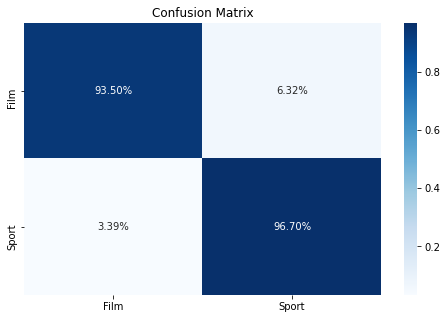

LogisticRegression(), CharLevel Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       354
           1       0.94      0.97      0.95       364

    accuracy                           0.95       718
   macro avg       0.95      0.95      0.95       718
weighted avg       0.95      0.95      0.95       718

**************************************************


In [69]:
Logistic_ACC = []
# Logistic Regression on Count Vectors
print('Logistic Regression on Count Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xtest_count, y_test, 
                       labels = ['Film','Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), Count Vectors: Classification Report\n", accuracy_report)
print('*'*50)

# Logistic Regression on Word Level TF IDF Vectors
print('Logistic Regression on Word Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf, y_test,
                      labels = ['Film','Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), WordLevel TF-IDF: Classification Report \n", accuracy_report)
print('*'*50)

# Logistic Regression on Ngram Level TF IDF Vectors
print('Logistic Regression on Ngram Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test,
                      labels = ['Film','Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Logistic Regression on Character Level TF IDF Vectors
print('Logistic Regression on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char, y_test,
                      labels = ['Film','Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), CharLevel Vectors: Classification Report \n", accuracy_report)
print('*'*50)

### xgboost.XGBClassifier()

XGBoost on Count Vectors: 

Confusion Matrix: 
 [[322  32]
 [  8 356]]


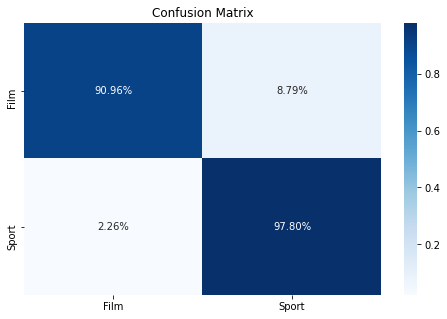

Xgb, Count Vectors: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       354
           1       0.92      0.98      0.95       364

    accuracy                           0.94       718
   macro avg       0.95      0.94      0.94       718
weighted avg       0.95      0.94      0.94       718

**************************************************
XGBoost on Word Level TF IDF Vectors: 

Confusion Matrix: 
 [[318  36]
 [ 10 354]]


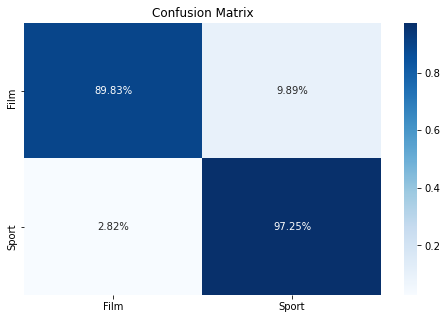

Xgb, WordLevel TF-IDF: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       354
           1       0.91      0.97      0.94       364

    accuracy                           0.94       718
   macro avg       0.94      0.94      0.94       718
weighted avg       0.94      0.94      0.94       718

**************************************************
XGBoost on Ngram Level TF IDF Vectors: 

Confusion Matrix: 
 [[346   8]
 [224 140]]


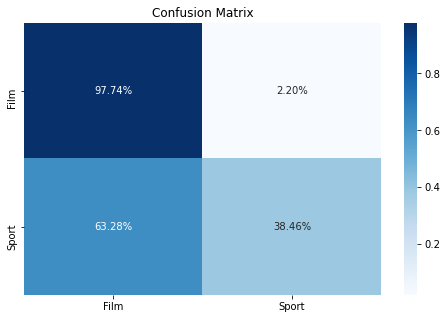

Xgb, N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.98      0.75       354
           1       0.95      0.38      0.55       364

    accuracy                           0.68       718
   macro avg       0.78      0.68      0.65       718
weighted avg       0.78      0.68      0.65       718

**************************************************
XGBoost on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[316  38]
 [ 14 350]]


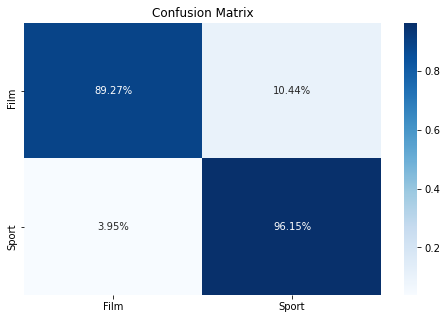

Xgb, CharLevel Vectors: 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       354
           1       0.90      0.96      0.93       364

    accuracy                           0.93       718
   macro avg       0.93      0.93      0.93       718
weighted avg       0.93      0.93      0.93       718

**************************************************


In [70]:
XGBoost_ACC = []
# Extereme Gradient Boosting on Count Vectors
print('XGBoost on Count Vectors: \n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(),
                                     y_train, xtest_count.tocsc(), y_test, labels = ['Film','Sport'])
XGBoost_ACC.append(score)
print("Xgb, Count Vectors: \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
print('XGBoost on Word Level TF IDF Vectors: \n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(),
                                     y_train, xtest_tfidf.tocsc(), y_test, labels = ['Film','Sport'])
XGBoost_ACC.append(score)
print("Xgb, WordLevel TF-IDF: \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Ngram Level TF IDF Vectors
print('XGBoost on Ngram Level TF IDF Vectors: \n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), y_train, xtest_tfidf_ngram.tocsc(), 
                                     y_test, labels = ['Film','Sport'])
XGBoost_ACC.append(score)
print("Xgb, N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
print('XGBoost on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_char.tocsc(), y_train, 
                                     xtest_tfidf_ngram_char.tocsc(), y_test,  labels = ['Film','Sport'])
XGBoost_ACC.append(score)
print("Xgb, CharLevel Vectors: \n", accuracy_report)
print('*'*50)

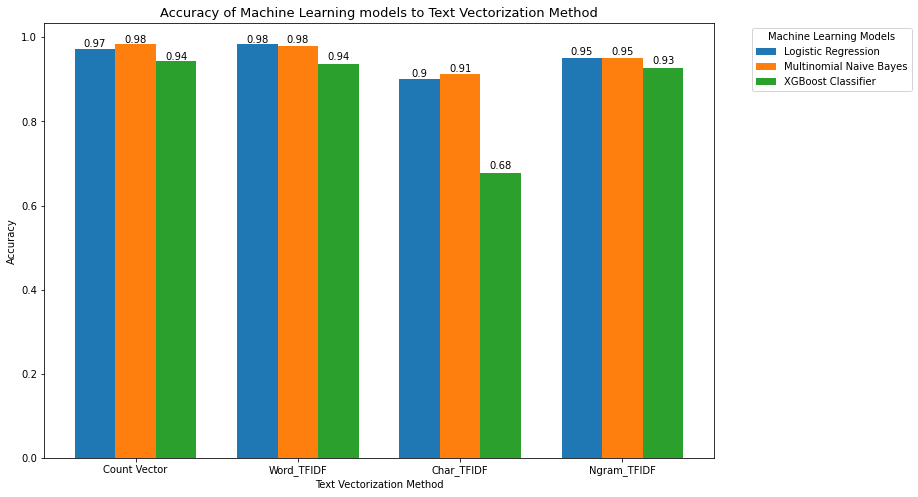

In [71]:
plot_bar_graph(Logistic_ACC, Multinomial_ACC, XGBoost_ACC)

***
# Insights: 
<b>
<li> We have implemented 3 machine learning models, for each machine learning model we have provided 4 different types of vectorized input. The comparision of accuracy is visualized in above grouped bar chart. </li>
<li> As per previous results, among all vectorizer algorithm, count vectorizer was proven to be an efficient text to vector transformer but here for logistic regression model word level TFIDF input is giving maximum accuracy of 98%</li>
<li>Like previous results, In case of TFIDF vector transformation word level TFIDF is better than other two, character level and NGRAM character level TFIDF vector transformation.</li>  
<li>Character level TFIDF vectorized input performs poorly on machine learning models.</li>    
</b>    

***
# Pair 3 (Sport & Politics) : 

In [72]:
y_test_3.value_counts()

Sport       364
Politics    362
Name: Category, dtype: int64

In [73]:
# transform input
xtrain_count, xtest_count = create_CountVectorizer(X_train_3, X_test_3)

xtrain_tfidf, xtest_tfidf = tfidf_word(X_train_3, X_test_3)

xtrain_tfidf_ngram, xtest_tfidf_ngram = tfidf_ngram(X_train_3, X_test_3)

xtrain_tfidf_ngram_char, xtest_tfidf_ngram_char = tfidf_char(X_train_3, X_test_3)

# transform target variable
y_train, y_test = encode_label(y_train_3, y_test_3)

TF-IDF word level:  (2901, 10233) (726, 10233)
TF-IDF ngram level:  (2901, 115724) (726, 115724)
TF-IDF character level:  (2901, 8542) (726, 8542)


***
# MultinomialNB

Naive Bayes on Count Vectors :

Confusion Matrix: 
 [[355   7]
 [  8 356]]


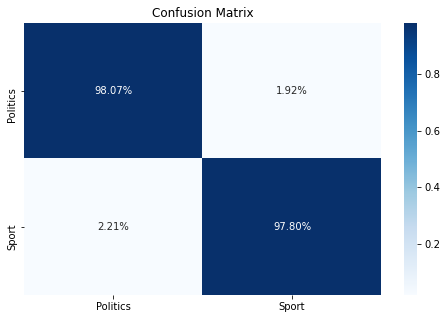

NB, Count Vectors: Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       362
           1       0.98      0.98      0.98       364

    accuracy                           0.98       726
   macro avg       0.98      0.98      0.98       726
weighted avg       0.98      0.98      0.98       726

**************************************************
Naive Bayes on Word Level TF IDF Vectors:

Confusion Matrix: 
 [[354   8]
 [ 13 351]]


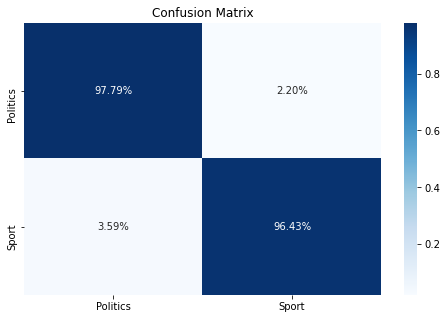

NB, WordLevel TF-IDF: Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       362
           1       0.98      0.96      0.97       364

    accuracy                           0.97       726
   macro avg       0.97      0.97      0.97       726
weighted avg       0.97      0.97      0.97       726

**************************************************
Naive Bayes on Ngram Level TF IDF Vectors:

Confusion Matrix: 
 [[344  18]
 [ 19 345]]


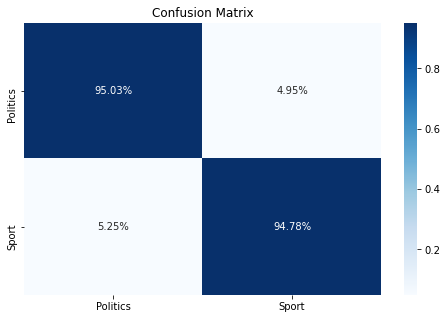

NB, N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       362
           1       0.95      0.95      0.95       364

    accuracy                           0.95       726
   macro avg       0.95      0.95      0.95       726
weighted avg       0.95      0.95      0.95       726

**************************************************
Naive Bayes on Character Level TF IDF Vectors:

Confusion Matrix: 
 [[343  19]
 [ 18 346]]


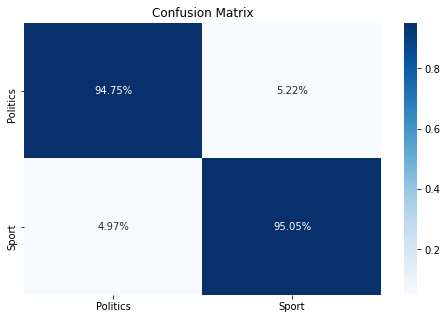

NB, CharLevel Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       362
           1       0.95      0.95      0.95       364

    accuracy                           0.95       726
   macro avg       0.95      0.95      0.95       726
weighted avg       0.95      0.95      0.95       726

**************************************************


In [74]:
Multinomial_ACC = []

# Naive Bayes on Count Vectors
print('Naive Bayes on Count Vectors :\n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test, 
                       labels = ['Politics','Sport'])
Multinomial_ACC.append(score)
print("NB, Count Vectors: Classification Report\n", accuracy_report)
print('*'*50)

# Naive Bayes on Word Level TF IDF Vectors
print('Naive Bayes on Word Level TF IDF Vectors:\n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf, y_test,
                      labels = ['Politics','Sport'])
Multinomial_ACC.append(score)
print("NB, WordLevel TF-IDF: Classification Report \n", accuracy_report)
print('*'*50)

# Naive Bayes on Ngram Level TF IDF Vectors
print('Naive Bayes on Ngram Level TF IDF Vectors:\n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test,
                      labels = ['Politics','Sport'])
Multinomial_ACC.append(score)
print("NB, N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Naive Bayes on Character Level TF IDF Vectors
print('Naive Bayes on Character Level TF IDF Vectors:\n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char, y_test,
                      labels = ['Politics','Sport'])
Multinomial_ACC.append(score)
print("NB, CharLevel Vectors: Classification Report \n", accuracy_report)
print('*'*50)

***
# Logistic Regression

Logistic Regression on Count Vectors: 

Confusion Matrix: 
 [[343  19]
 [  6 358]]


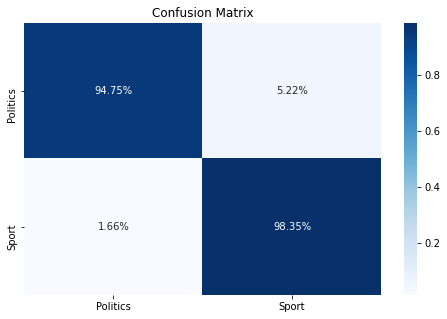

LogisticRegression(), Count Vectors: Classification Report
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       362
           1       0.95      0.98      0.97       364

    accuracy                           0.97       726
   macro avg       0.97      0.97      0.97       726
weighted avg       0.97      0.97      0.97       726

**************************************************
Logistic Regression on Word Level TF IDF Vectors: 

Confusion Matrix: 
 [[339  23]
 [  4 360]]


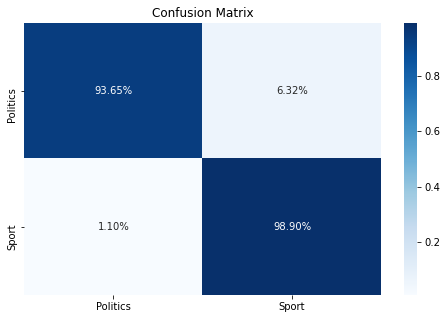

LogisticRegression(), WordLevel TF-IDF: Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       362
           1       0.94      0.99      0.96       364

    accuracy                           0.96       726
   macro avg       0.96      0.96      0.96       726
weighted avg       0.96      0.96      0.96       726

**************************************************
Logistic Regression on Ngram Level TF IDF Vectors: 

Confusion Matrix: 
 [[323  39]
 [  5 359]]


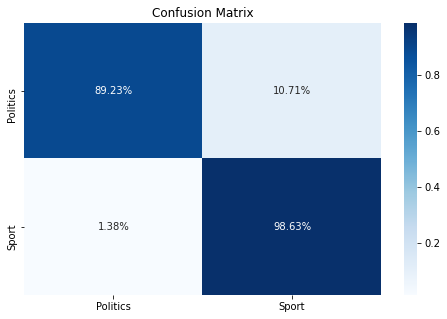

LogisticRegression(), N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.89      0.94       362
           1       0.90      0.99      0.94       364

    accuracy                           0.94       726
   macro avg       0.94      0.94      0.94       726
weighted avg       0.94      0.94      0.94       726

**************************************************
Logistic Regression on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[333  29]
 [ 13 351]]


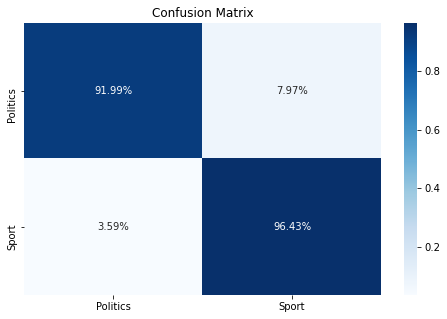

LogisticRegression(), CharLevel Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       362
           1       0.92      0.96      0.94       364

    accuracy                           0.94       726
   macro avg       0.94      0.94      0.94       726
weighted avg       0.94      0.94      0.94       726

**************************************************


In [75]:
Logistic_ACC = []
# Logistic Regression on Count Vectors
print('Logistic Regression on Count Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xtest_count, y_test, 
                       labels = ['Politics', 'Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), Count Vectors: Classification Report\n", accuracy_report)
print('*'*50)

# Logistic Regression on Word Level TF IDF Vectors
print('Logistic Regression on Word Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf, y_test,
                      labels = ['Politics', 'Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), WordLevel TF-IDF: Classification Report \n", accuracy_report)
print('*'*50)

# Logistic Regression on Ngram Level TF IDF Vectors
print('Logistic Regression on Ngram Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test,
                      labels = ['Politics', 'Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Logistic Regression on Character Level TF IDF Vectors
print('Logistic Regression on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char, y_test,
                      labels = ['Politics', 'Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), CharLevel Vectors: Classification Report \n", accuracy_report)
print('*'*50)

***
# xgboost.XGBClassifier()

XGBoost on Count Vectors:

Confusion Matrix: 
 [[335  27]
 [  9 355]]


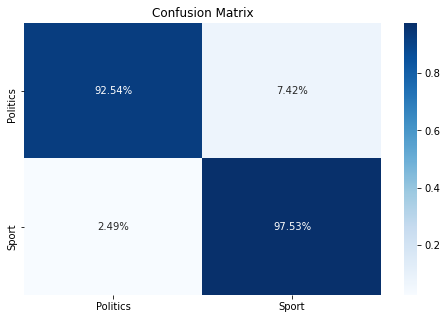

Xgb, Count Vectors: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       362
           1       0.93      0.98      0.95       364

    accuracy                           0.95       726
   macro avg       0.95      0.95      0.95       726
weighted avg       0.95      0.95      0.95       726

**************************************************
XGBoost on Word Level TF IDF Vectors:

Confusion Matrix: 
 [[337  25]
 [ 12 352]]


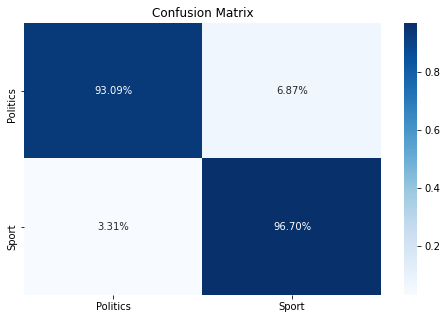

Xgb, WordLevel TF-IDF: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       362
           1       0.93      0.97      0.95       364

    accuracy                           0.95       726
   macro avg       0.95      0.95      0.95       726
weighted avg       0.95      0.95      0.95       726

**************************************************
XGBoost on Ngram Level TF IDF Vectors:

Confusion Matrix: 
 [[226 136]
 [  4 360]]


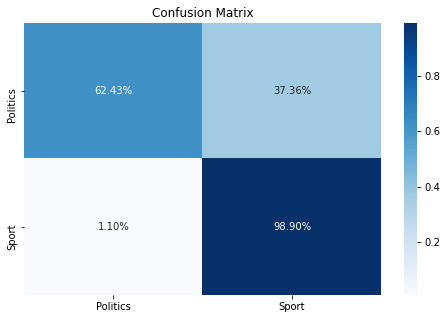

Xgb, N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.62      0.76       362
           1       0.73      0.99      0.84       364

    accuracy                           0.81       726
   macro avg       0.85      0.81      0.80       726
weighted avg       0.85      0.81      0.80       726

**************************************************
XGBoost on Character Level TF IDF Vectors:

Confusion Matrix: 
 [[331  31]
 [ 16 348]]


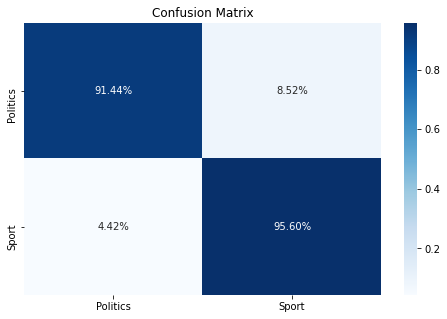

Xgb, CharLevel Vectors: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       362
           1       0.92      0.96      0.94       364

    accuracy                           0.94       726
   macro avg       0.94      0.94      0.94       726
weighted avg       0.94      0.94      0.94       726

**************************************************


In [76]:
XGBoost_ACC = []
# Extereme Gradient Boosting on Count Vectors
print('XGBoost on Count Vectors:\n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(),
                                     y_train, xtest_count.tocsc(), y_test, labels = ['Politics', 'Sport'])
XGBoost_ACC.append(score)
print("Xgb, Count Vectors: \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
print('XGBoost on Word Level TF IDF Vectors:\n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(),
                                     y_train, xtest_tfidf.tocsc(), y_test, labels = ['Politics', 'Sport'])
XGBoost_ACC.append(score)
print("Xgb, WordLevel TF-IDF: \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Ngram Level TF IDF Vectors
print('XGBoost on Ngram Level TF IDF Vectors:\n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), y_train, xtest_tfidf_ngram.tocsc(), 
                                     y_test, labels = ['Politics', 'Sport'])
XGBoost_ACC.append(score)
print("Xgb, N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
print('XGBoost on Character Level TF IDF Vectors:\n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_char.tocsc(), y_train, 
                                     xtest_tfidf_ngram_char.tocsc(), y_test,  labels = ['Politics', 'Sport'])
XGBoost_ACC.append(score)
print("Xgb, CharLevel Vectors: \n", accuracy_report)
print('*'*50)

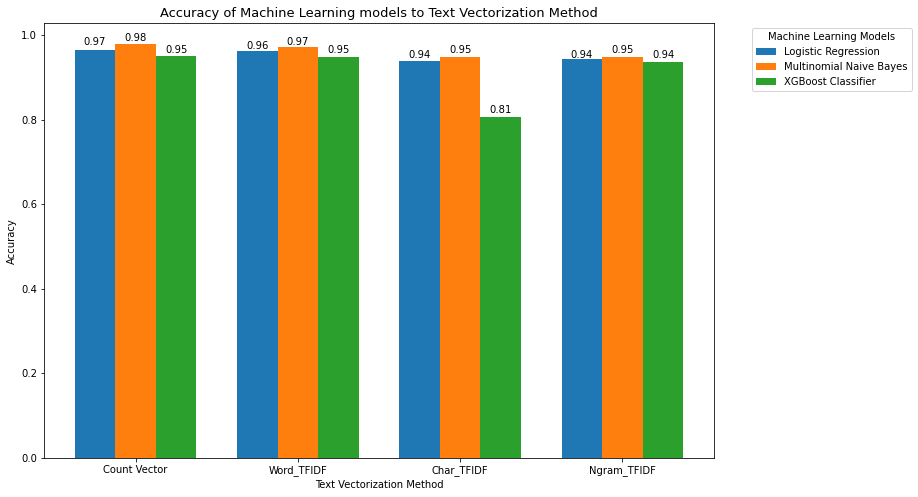

In [77]:
plot_bar_graph(Logistic_ACC, Multinomial_ACC, XGBoost_ACC)

***
## Insights: 
<b>
<li> We have implemented 3 machine learning models, for each machine learning model we have provided 4 different types of vectorized input. The comparision of accuracy is visualized in above grouped bar chart. </li>
<li> As per previous results, among all vectorizer algorithm, count vectorizer was proven to be an efficient text to vector transformer but word level TFIDF input is also giving similar accuracy as count vector method.</li>
<li>Like previous results, In case of TFIDF vector transformation word level TFIDF is better than other two, character level and NGRAM character level TFIDF vector transformation.</li>  
<li>Character level TFIDF vectorized input performs poorly on machine learning models.</li>
<li> Multinomial Naive Bayes is proven to be most accurate model for count vector as well as word TFIDF vector input.</li>
</b>    

## Comparision between all unique Pairs:
<b>
    <ol>
    <li>Pair 1: Film and Politics</li>
    <li>Pair 2: Film and Sport</li>
    <li>Pair 3: Politics and Sport</li></ol>
        
- As we have above 3 pairs, we will discuss the performance of Multinomial model and logistic regression as these are the most effective models provided by count vectorizer of each pair. <br>
- Multinomial is performs considerably better than logistic regression, for pair 1, it is 99% accurate, means model can easily classify Film and Politics categories and for remaining pairs the accuracy is 98%. <br>
- This is the same scenario with Logistic Regression model, the accuracy of pair 1 (98%) is more than accuracy of remaining pairs (97%). <br>
- We can conclude that for these models, Film and Politics category is comparatively easy to distinguish than remaining two. <br> 
</b>

<span style="color:Red">
In Task 2, there are three unique pairs, so some code is repeated for pair 2 and pair 3, but as we have 4 different types of vectorized input and 3 machine learning models, I would have implemented a methos which takes a pair and all machine learning algorithm but that way the code would have become less readable and more complex. <br>
    Above implementation is developed after considering all code complexity, readability and code reusability.
</span>

***
# <a id = 'task3'> Task 3: Multiclass Text Classification
    
All the methods generated above for preprocessing, NLP and text feature generated will be used as defined above.

In [78]:
df.head()

,Category,Text,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,Film,war epic airman young sopranos essential film ...,152,24,6.080000,0,0,0,14,2,5,0,0
1,Sport,twenty athlete set light tokyo 0 olympics dina...,151,26,5.592593,0,0,0,9,5,8,1,0
2,Film,the excite movie 0 – horror the grudge a belat...,156,26,5.777778,0,0,0,12,1,6,0,0
3,Politics,clive lewis call unity among labour leadership...,185,27,6.607143,0,0,0,17,1,8,0,0
4,Sport,michael van gerwen 37 peter wright pdc world d...,192,30,6.193548,0,0,0,21,8,4,2,0


In [79]:
df.Category.value_counts()

Sport       1819
Politics    1808
Film        1771
Name: Category, dtype: int64

In [80]:
# split the dataset into train and text datasets 
X_train, X_test, y_train, y_test = model_selection.train_test_split(df['Text'], df['Category'], shuffle=True, 
                                                                    stratify=df['Category'], test_size=0.20)

In [81]:
y_test.value_counts()

Sport       364
Politics    362
Film        354
Name: Category, dtype: int64

***
# <a id ='preprocessing2'> Preprocessing & Feature transformation

In [82]:
df = preprocess_text(df)
df.head()

,Category,Text,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,Film,war epic airman young soprano essential film 0...,152,24,6.080000,0,0,0,14,2,5,0,0
1,Sport,twenty athlete set light tokyo 0 olympics dina...,151,26,5.592593,0,0,0,9,5,8,1,0
2,Film,excite movie 0 – horror grudge belated english...,156,26,5.777778,0,0,0,12,1,6,0,0
3,Politics,clive lewis call unity among labour leadership...,185,27,6.607143,0,0,0,17,1,8,0,0
4,Sport,michael van gerwen 37 peter wright pdc world d...,192,30,6.193548,0,0,0,21,8,4,2,0


In [83]:
generate_text_features(df)
df.head()

,Category,Text,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,Film,war epic airman young soprano essential film 0...,146,23,6.083333,0,0,0,14,2,5,0,0
1,Sport,twenty athlete set light tokyo 0 olympics dina...,144,23,6.000000,0,0,0,9,5,8,1,0
2,Film,excite movie 0 – horror grudge belated english...,142,22,6.173913,0,0,0,12,1,6,0,0
3,Politics,clive lewis call unity among labour leadership...,181,26,6.703704,0,0,0,17,1,8,0,0
4,Sport,michael van gerwen 37 peter wright pdc world d...,191,30,6.161290,0,0,0,21,8,4,2,0


In [84]:
df.describe()

,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
count,5398.000000,5398.000000,5398.000000,5398.0,5398.0,5398.0,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000
mean,159.525195,24.523712,6.270115,0.0,0.0,0.0,14.929418,3.477399,5.123564,1.074287,0.322527
std,16.625144,2.608209,0.528879,0.0,0.0,0.0,3.099849,1.697787,2.015071,1.127684,0.613220
min,101.000000,15.000000,4.758621,0.0,0.0,0.0,4.000000,0.000000,0.000000,0.000000,0.000000
25%,149.000000,23.000000,5.909091,0.0,0.0,0.0,13.000000,2.000000,4.000000,0.000000,0.000000
50%,160.000000,24.000000,6.259259,0.0,0.0,0.0,15.000000,3.000000,5.000000,1.000000,0.000000
75%,170.000000,26.000000,6.608696,0.0,0.0,0.0,17.000000,5.000000,6.000000,2.000000,1.000000
max,221.000000,37.000000,8.476190,0.0,0.0,0.0,28.000000,11.000000,14.000000,9.000000,6.000000


## Multiclass Classification : Feature Transformation 

In [85]:
y_test.value_counts()

Sport       364
Politics    362
Film        354
Name: Category, dtype: int64

In [86]:
# transform input
xtrain_count, xtest_count = create_CountVectorizer(X_train, X_test)

xtrain_tfidf, xtest_tfidf = tfidf_word(X_train, X_test)

xtrain_tfidf_ngram, xtest_tfidf_ngram = tfidf_ngram(X_train, X_test)

xtrain_tfidf_ngram_char, xtest_tfidf_ngram_char = tfidf_char(X_train, X_test)

# transform target variable
y_train, y_test = encode_label(y_train, y_test)

TF-IDF word level:  (4318, 15619) (1080, 15619)
TF-IDF ngram level:  (4318, 174783) (1080, 174783)
TF-IDF character level:  (4318, 10035) (1080, 10035)


****
# <a id = 'machine2'> Machine Learning Model Implementation : Multiclass
# MultinomialNB

Naive Bayes on Count Vectos: 

Confusion Matrix: 
 [[344   5   5]
 [  9 351   2]
 [  8   7 349]]


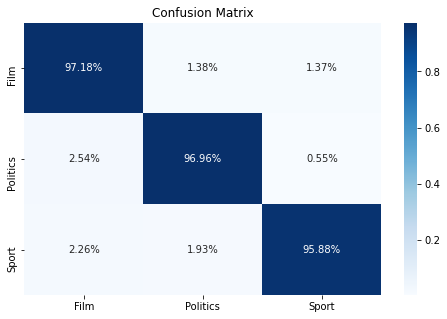

NB, Count Vectors: Classification Report
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       354
           1       0.97      0.97      0.97       362
           2       0.98      0.96      0.97       364

    accuracy                           0.97      1080
   macro avg       0.97      0.97      0.97      1080
weighted avg       0.97      0.97      0.97      1080

**************************************************
Naive Bayes on Word Level TF IDF Vectors: 

Confusion Matrix: 
 [[340   8   6]
 [  5 354   3]
 [  6   9 349]]


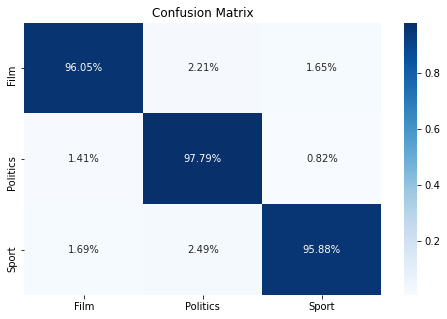

NB, WordLevel TF-IDF: Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       354
           1       0.95      0.98      0.97       362
           2       0.97      0.96      0.97       364

    accuracy                           0.97      1080
   macro avg       0.97      0.97      0.97      1080
weighted avg       0.97      0.97      0.97      1080

**************************************************
Naive Bayes on Ngram Level TF IDF Vectors: 

Confusion Matrix: 
 [[306  14  34]
 [  6 351   5]
 [ 29  13 322]]


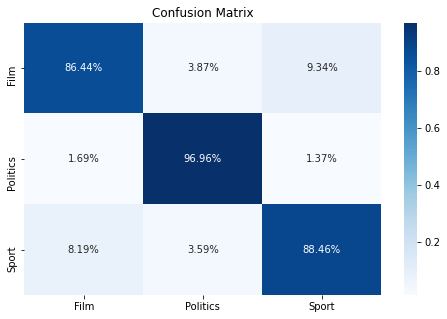

NB, N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       354
           1       0.93      0.97      0.95       362
           2       0.89      0.88      0.89       364

    accuracy                           0.91      1080
   macro avg       0.91      0.91      0.91      1080
weighted avg       0.91      0.91      0.91      1080

**************************************************
Naive Bayes on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[322  13  19]
 [ 10 334  18]
 [ 12  15 337]]


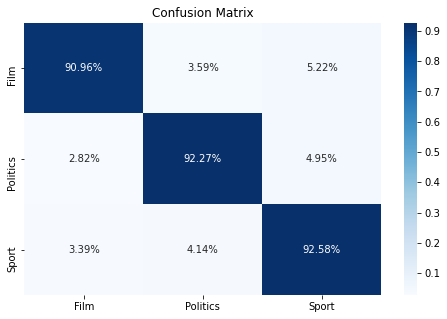

NB, CharLevel Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       354
           1       0.92      0.92      0.92       362
           2       0.90      0.93      0.91       364

    accuracy                           0.92      1080
   macro avg       0.92      0.92      0.92      1080
weighted avg       0.92      0.92      0.92      1080

**************************************************


In [87]:
Multinomial_ACC = []
# Naive Bayes on Count Vectors
print('Naive Bayes on Count Vectos: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test, 
                       labels = ['Film','Politics','Sport'])
Multinomial_ACC.append(score)
print("NB, Count Vectors: Classification Report\n", accuracy_report)
print('*'*50)

# Naive Bayes on Word Level TF IDF Vectors
print('Naive Bayes on Word Level TF IDF Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf, y_test,
                      labels = ['Film','Politics','Sport'])
Multinomial_ACC.append(score)
print("NB, WordLevel TF-IDF: Classification Report \n", accuracy_report)
print('*'*50)

# Naive Bayes on Ngram Level TF IDF Vectors
print('Naive Bayes on Ngram Level TF IDF Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test,
                      labels = ['Film','Politics','Sport'])
Multinomial_ACC.append(score)
print("NB, N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Naive Bayes on Character Level TF IDF Vectors
print('Naive Bayes on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char, y_test,
                      labels = ['Film','Politics','Sport'])
Multinomial_ACC.append(score)
print("NB, CharLevel Vectors: Classification Report \n", accuracy_report)
print('*'*50)

***
# Logistic Regression

Logistic Regression on count vector: 

Confusion Matrix: 
 [[336   4  14]
 [  5 350   7]
 [ 10   3 351]]


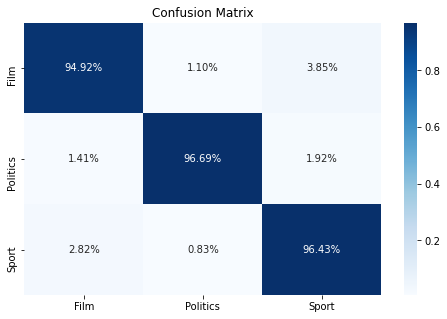

LogisticRegression(), Count Vectors: Classification Report
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       354
           1       0.98      0.97      0.97       362
           2       0.94      0.96      0.95       364

    accuracy                           0.96      1080
   macro avg       0.96      0.96      0.96      1080
weighted avg       0.96      0.96      0.96      1080

**************************************************
Logistic Regression on Word Level TF IDF Vectors: 

Confusion Matrix: 
 [[341   3  10]
 [  7 346   9]
 [  8   4 352]]


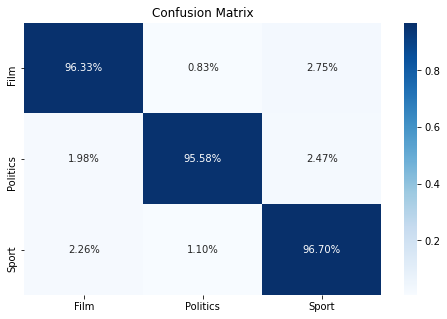

LogisticRegression(), WordLevel TF-IDF: Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       354
           1       0.98      0.96      0.97       362
           2       0.95      0.97      0.96       364

    accuracy                           0.96      1080
   macro avg       0.96      0.96      0.96      1080
weighted avg       0.96      0.96      0.96      1080

**************************************************
Logistic Regression on Ngram Level TF IDF Vectors: 

Confusion Matrix: 
 [[326   7  21]
 [ 20 331  11]
 [ 40   6 318]]


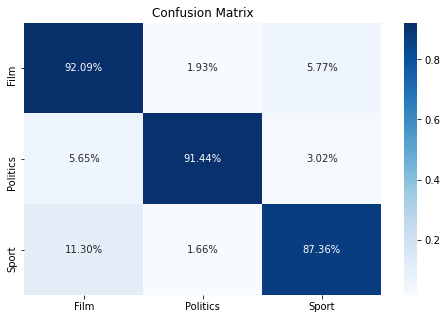

LogisticRegression(), N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       354
           1       0.96      0.91      0.94       362
           2       0.91      0.87      0.89       364

    accuracy                           0.90      1080
   macro avg       0.91      0.90      0.90      1080
weighted avg       0.91      0.90      0.90      1080

**************************************************
Logistic Regression on Character Level TF IDF Vectors: 

Confusion Matrix: 
 [[326   6  22]
 [ 11 332  19]
 [  9   9 346]]


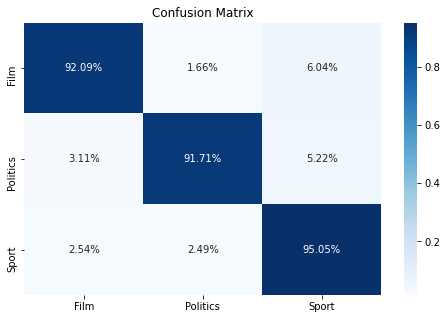

LogisticRegression(), CharLevel Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       354
           1       0.96      0.92      0.94       362
           2       0.89      0.95      0.92       364

    accuracy                           0.93      1080
   macro avg       0.93      0.93      0.93      1080
weighted avg       0.93      0.93      0.93      1080

**************************************************


In [88]:
Logistic_ACC = []
# Logistic Regression on Count Vectors
print('Logistic Regression on count vector: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xtest_count, y_test, 
                       labels = ['Film','Politics','Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), Count Vectors: Classification Report\n", accuracy_report)
print('*'*50)

# Logistic Regression on Word Level TF IDF Vectors
print('Logistic Regression on Word Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf, y_test,
                      labels = ['Film','Politics','Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), WordLevel TF-IDF: Classification Report \n", accuracy_report)
print('*'*50)

# Logistic Regression on Ngram Level TF IDF Vectors
print('Logistic Regression on Ngram Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test,
                      labels = ['Film','Politics','Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Logistic Regression on Character Level TF IDF Vectors
print('Logistic Regression on Character Level TF IDF Vectors: \n')
accuracy_report, score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char, y_test,
                      labels = ['Film','Politics','Sport'])
Logistic_ACC.append(score)
print("LogisticRegression(), CharLevel Vectors: Classification Report \n", accuracy_report)
print('*'*50)

***
# XGBoost

XGBoost on count vectors:

Confusion Matrix: 
 [[314   6  34]
 [  1 341  20]
 [  7   5 352]]


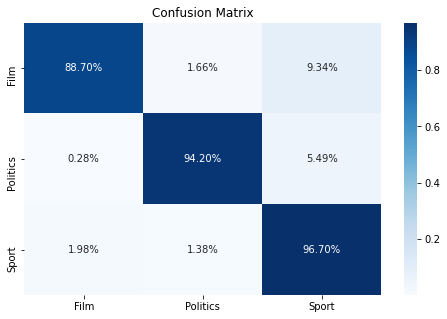

Xgb, Count Vectors: 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       354
           1       0.97      0.94      0.96       362
           2       0.87      0.97      0.91       364

    accuracy                           0.93      1080
   macro avg       0.94      0.93      0.93      1080
weighted avg       0.94      0.93      0.93      1080

**************************************************
XGBoost on Word Level TF IDF Vectors:

Confusion Matrix: 
 [[314  11  29]
 [  2 339  21]
 [  8   8 348]]


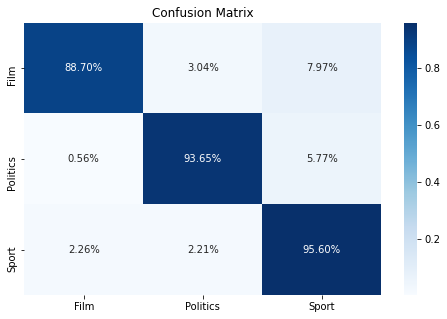

Xgb, WordLevel TF-IDF: 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       354
           1       0.95      0.94      0.94       362
           2       0.87      0.96      0.91       364

    accuracy                           0.93      1080
   macro avg       0.93      0.93      0.93      1080
weighted avg       0.93      0.93      0.93      1080

**************************************************
XGBoost on Ngram Level TF IDF Vectors:

Confusion Matrix: 
 [[348   2   4]
 [111 245   6]
 [200   0 164]]


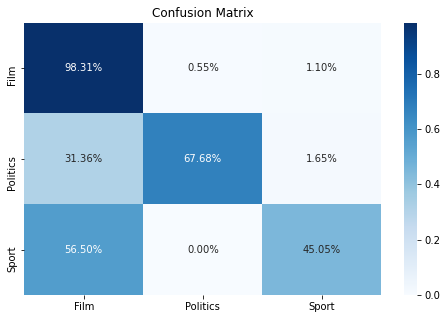

Xgb, N-Gram Vectors: Classification Report 
               precision    recall  f1-score   support

           0       0.53      0.98      0.69       354
           1       0.99      0.68      0.80       362
           2       0.94      0.45      0.61       364

    accuracy                           0.70      1080
   macro avg       0.82      0.70      0.70      1080
weighted avg       0.82      0.70      0.70      1080

**************************************************
XGBoost on Character Level TF IDF Vectors:

Confusion Matrix: 
 [[311   9  34]
 [  6 330  26]
 [  6  14 344]]


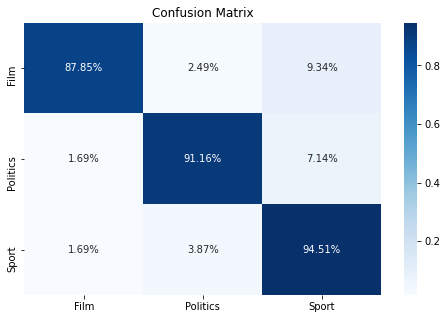

Xgb, CharLevel Vectors: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       354
           1       0.93      0.91      0.92       362
           2       0.85      0.95      0.90       364

    accuracy                           0.91      1080
   macro avg       0.92      0.91      0.91      1080
weighted avg       0.92      0.91      0.91      1080

**************************************************


In [89]:
XGBoost_ACC = []
# Extereme Gradient Boosting on Count Vectors
print('XGBoost on count vectors:\n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(),
                                     y_train, xtest_count.tocsc(), y_test, labels = ['Film','Politics','Sport'])
XGBoost_ACC.append(score)
print("Xgb, Count Vectors: \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
print('XGBoost on Word Level TF IDF Vectors:\n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(),
                                     y_train, xtest_tfidf.tocsc(), y_test, labels = ['Film','Politics','Sport'])
XGBoost_ACC.append(score)
print("Xgb, WordLevel TF-IDF: \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Ngram Level TF IDF Vectors
print('XGBoost on Ngram Level TF IDF Vectors:\n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), y_train, xtest_tfidf_ngram.tocsc(), 
                                     y_test, labels = ['Film','Politics','Sport'])
XGBoost_ACC.append(score)
print("Xgb, N-Gram Vectors: Classification Report \n", accuracy_report)
print('*'*50)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
print('XGBoost on Character Level TF IDF Vectors:\n')
accuracy_report, score = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_char.tocsc(), y_train, 
                                     xtest_tfidf_ngram_char.tocsc(), y_test,  labels = ['Film','Politics','Sport'])
XGBoost_ACC.append(score)
print("Xgb, CharLevel Vectors: \n", accuracy_report)
print('*'*50)

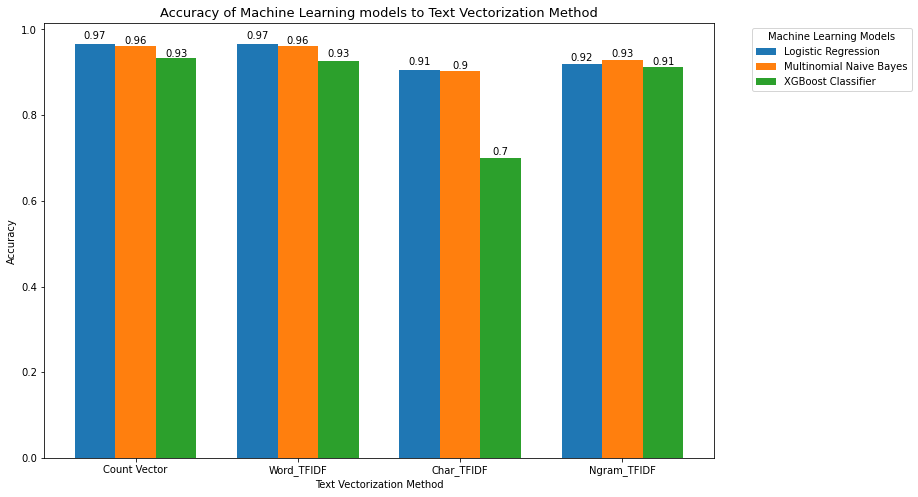

In [90]:
plot_bar_graph(Multinomial_ACC, Logistic_ACC, XGBoost_ACC)

***
# Insights: 
<b>
<li> For multiclass classification, we have implemented 3 machine learning models, for each machine learning model we have provided 4 different types of vectorized input. The comparision of accuracy is visualized in above grouped bar chart. </li>
<li> As per binary classification results, among all vectorizer algorithm, count vectorizer is proven to be an efficient text to vector transformer but word level TFIDF input is also giving similar accuracy as count vector method.</li>
<li>Like previous results, In case of TFIDF vector transformation word level TFIDF is better than other two, character level and NGRAM character level TFIDF vector transformation.</li>  
<li>Character level TFIDF vectorized input performs poorly on machine learning models, especially XGBoost Classifier.</li>
<li> Multinomial Naive Bayes is proven to the best model for all type of input and the most accurate model for count vector as well as word TFIDF vector input.</li>
</b>    

***
# <a id = 'wordembedding'>  Word Embeddings For Neural Network 
<b> Word Embedding represents dense vector form of documents and words. The vector is generated from training input corpus and can also be generated using pre-trained word embedding such as Word2Vec, Glove etc. Word Embedding also considers the surrounding words and the context of word. Word Embedding can be performed using below steps,


<OL>   
<li>Load the pre-trained word-embedding vectors</li>
<li>Create a tokenizer</li>
<li>Convert text to sequence and apply padding</li>
<li>Create token and embedding mapping</li>
</OL>
</b>
    
<span style="color:Blue">
Neural Network requires high volume of training data, so just for a learning purpose below neural networks are implemented using keras. To fulfill the void of high volume data input, the pretrained word embedding is used as below,
</span>
<br>    

***
    
<span style="color:Red">
To Exceute below cell please download <a href = 'https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip'>'wiki-news-300d-1M.vec'</a> zip file and extract it on appropriate location. 
</span>

***

In [91]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(X_train)
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(X_train), maxlen=40)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(X_test), maxlen=40)

# create token-embedding mapping
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [92]:
embedding_matrix.shape

(16974, 300)

In [93]:
y_train_ = pd.get_dummies(y_train).values
y_test_ = pd.get_dummies(y_test).values

***
# LSTM : Long Short Term Memory

This neural network is very efficient in processsing the information of recurrent features. This is one of the widely used algorithm in text classification, text auto completion and various domains where information of recurrent features is required.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 40, 300)           5092200   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 40, 300)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153   

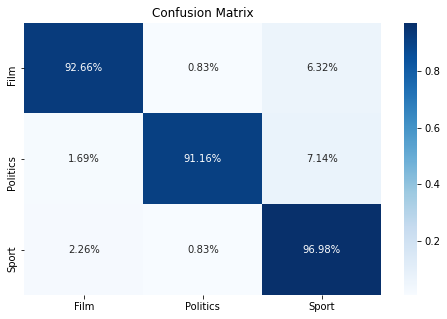

RNN-LSTM, Word Embeddings 
                precision    recall  f1-score   support

           0       0.96      0.93      0.94       354
           1       0.98      0.91      0.95       362
           2       0.88      0.97      0.92       364

    accuracy                           0.94      1080
   macro avg       0.94      0.94      0.94      1080
weighted avg       0.94      0.94      0.94      1080



In [94]:
def create_rnn_lstm():
    # Add an Input Layer
    input_layer = layers.Input((40, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(3, activation="softmax")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy')
    
    return model

classifier = create_rnn_lstm()
print(classifier.summary())

accuracy_report, score = train_model(classifier, train_seq_x, y_train_, valid_seq_x, y_test_, labels = ['Film','Politics','Sport'], is_neural_net=True)

print("RNN-LSTM, Word Embeddings \n ",  accuracy_report)

# CNN : Convolutionary Neural Network

- This algorithms is efficient in processing spatial information of text, for example, to extract the context of text, few surrounding words are important, this algorithm is very efficient in processing such sequence, the size of sequence is as per provided kernel size which is 3. <br>
- CNN has wide range of application in text and image classification.<br>
- Along with CNN we have added few more layers such as Bidirectional layer of GRU, which will process features in both direction from right to left and from left to right.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 40, 300)           5092200   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 40, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 38, 100)           90100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0   

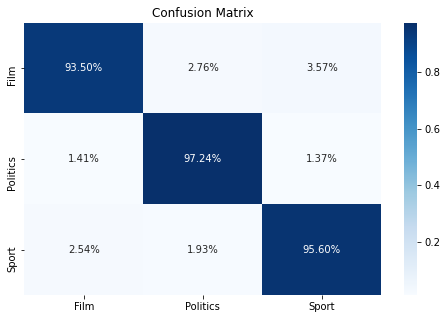

CNN, Word Embeddings 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       354
           1       0.95      0.97      0.96       362
           2       0.95      0.96      0.95       364

    accuracy                           0.95      1080
   macro avg       0.95      0.95      0.95      1080
weighted avg       0.95      0.95      0.95      1080



In [95]:
def create_rcnn():
    # Add an Input Layer
    input_layer = layers.Input((40, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    
    # Add the recurrent layer
    rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    
    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(3, activation="softmax")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy')
    
    return model

classifier = create_rcnn()
print(classifier.summary())
accuracy_report, score = train_model(classifier, train_seq_x, y_train_, valid_seq_x, y_test_, 
                       labels = ['Film','Politics','Sport'], is_neural_net=True)

print("CNN, Word Embeddings \n",  accuracy_report )

***
# Insigths:
<li>Along with Machine Learning models, 2 neural networks are also implemented. The results of machine learning algorithms is explained in detail.</li>
<li>Despite of low volume of input data, neural networks are classifying the text very efficiently, LSTM network is 93% efficient and CNN with bidirectional GRU is providing accuracy of 95%.</li>

***
# <a id ='conclusion'> Conclusion:

<li>In this assignment, the data is collected by utilizing web scraping approach and methodologies.</li>
<li>Libraries like BeautifulSoup makes it easier to access HTML tags, after collecting all information the dataset is created by choosing 3 categories of data.</li>
<li>In Text classification, initially some text and NLP features are generated to know more about data such as word count, word density and number of verbs, nouns and many more as illustrated above.</li>
<li>Text preprocessing is implemented using regular expression and string utilities and some of the NLTK's libraries.</li>
<li>After preprocessing the tokenized vectors of words are created using countvector and TFIDF tokenizer, these are the inputs for all machine learning algorithms.</li>
<li>For character level Ngram, XGBoost performs miserably poor. for all categories and other models also performs less efficient for character level Ngram as compared to other encodings.</li>    
<li>For binary classification, 3 pairs of input data is trained for classification, the results were also discussed in the markdown.</li>
<li>For multiclass classification, along with machine learning algorithm ,2 neural networks are also implemented.</li>
<li>The average accuracy for binary classification is around 98% to 99% and for multiclass classification it is around 95% to 96%. The confusion matrix is also visualized to get more information about positive and negative rate.</li>
    <li>Several methods are created to avoid code duplication.</li>    

***